# Group 4 Notebook: Machine Learning for Health with ERF Implementation

This notebook, created by Group 4 for machine learning in the health domain, focuses on the implementation of the ERF (Expert Rule Fit) method.

Due to prolonged package installation times, it is recommended to utilize R instead of Colab for smoother operations. To facilitate this, you'll need to copy the 'ERF Main Function' along with the 'ERF Auxiliary'. Afterward, proceed to replicate the data processing steps and other necessary procedures.

**authors: Chi Him Ng, Dheeraj Varghese and
Danila Rusinkiewicz**

In [ ]:
#sets the project id
PROJECT_ID = "tactile-acrobat-405220" #@param {type:"string"}

# Provide your credentials to access the AmsterdamUMCdb dataset on Google BigQuery
Authenticate your credentials with Google Cloud Platform and set your default Google Cloud Project ID as an environment variable for running query jobs. Run the cell, follow the generated link, and paste the verification code in the provided box:

In [ ]:
import os
from google.colab import auth

#sets dateset
DATASET_PROJECT_ID = 'amsterdamumcdb'
DATASET_ID = 'version1_0_2'
LOCATION = 'eu'

#all libraries check this environment variable, so set it:
os.environ["GOOGLE_CLOUD_PROJECT"] = PROJECT_ID

auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/MLRH/data_temporal.csv'

# Read the CSV file into a Pandas DataFrame
result_105 = pd.read_csv(file_path)

result_105

,admissionid,hour,creatinine,urine,measuredat,baseline_creatinine,temp,heart_rate,systolic_ABP,mean_ABP,...,calcium_change,kalium_change,ox_sat_change,thrombo_change,bilirubine_change,leukocyten_change,hematocryt_change,lactate_change,sodium_change,ph_change
0,4.0,0,98.0,195.000000,0,91.0,35.400000,75.000000,113.333333,69.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.00,0.0,0.0
1,4.0,1,98.0,170.000000,10800000,91.0,35.566667,72.333333,112.666667,66.333333,...,0.0,0.0,0.833333,66.0,0.0,0.000000,0.0050,-0.75,0.5,0.0
2,4.0,2,98.0,170.000000,21600000,91.0,36.333333,73.333333,127.666667,71.333333,...,0.0,0.0,1.166667,-24.0,0.0,0.000000,-0.0100,2.00,0.0,0.0
3,4.0,3,98.0,195.000000,32400000,91.0,36.533333,99.000000,168.666667,98.333333,...,0.0,0.0,-0.833333,0.0,0.0,0.000000,-0.0025,0.55,0.0,0.0
4,4.0,4,98.0,130.000000,43200000,91.0,36.366667,99.000000,141.333333,85.333333,...,0.0,0.0,-0.333333,0.0,0.0,0.000000,-0.0025,-1.25,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492207,23548.0,83,39.0,400.000000,896400000,47.0,36.700000,112.000000,154.000000,118.000000,...,0.0,-0.3,0.500000,0.0,0.0,0.000000,0.0000,0.00,0.0,0.0
492208,23548.0,84,39.0,190.897689,907200000,47.0,36.700000,87.000000,154.000000,118.000000,...,0.0,-0.2,-2.000000,0.0,0.0,0.000000,0.0000,0.00,1.0,0.0
492209,23548.0,85,39.0,253.072673,918000000,47.0,36.700000,88.000000,154.000000,118.000000,...,0.0,0.0,2.000000,0.0,0.0,0.000000,0.0000,0.00,0.0,0.0
492210,23548.0,86,41.0,680.000000,928800000,47.0,36.800000,99.000000,154.000000,118.000000,...,0.0,0.3,0.000000,18.0,0.0,1.699999,-0.0300,0.00,-1.0,0.0


In [ ]:
for col in result_105.columns:
  print(col)

In [ ]:
grouped_df = result_105.groupby('admissionid')['comparison_result'].agg(list).reset_index()

# Print 'admissionid' and 'comparison_result' columns as a DataFrame
grouped_df

,admissionid,comparison_result
0,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]"
1,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,12,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
8059,23542,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8060,23545,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8061,23546,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8062,23547,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


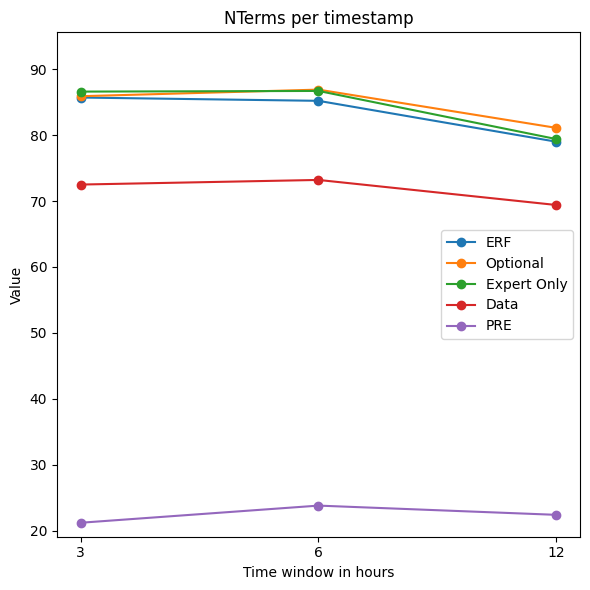

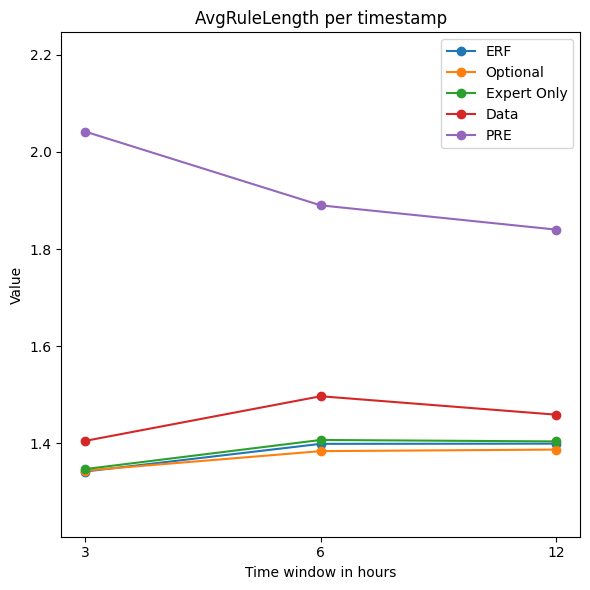

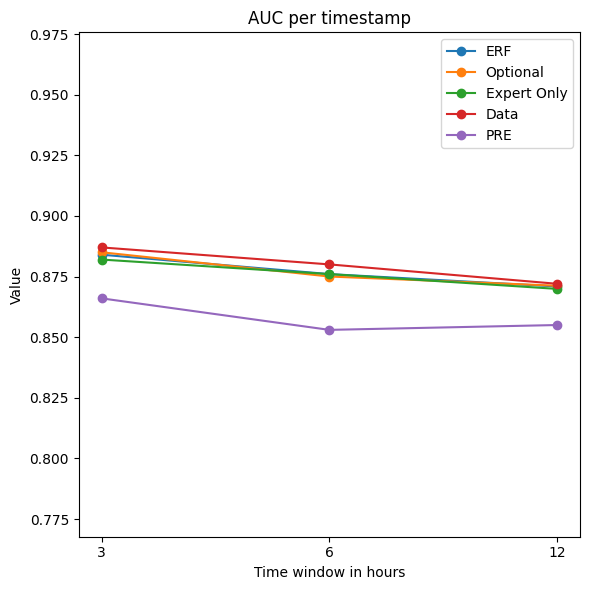

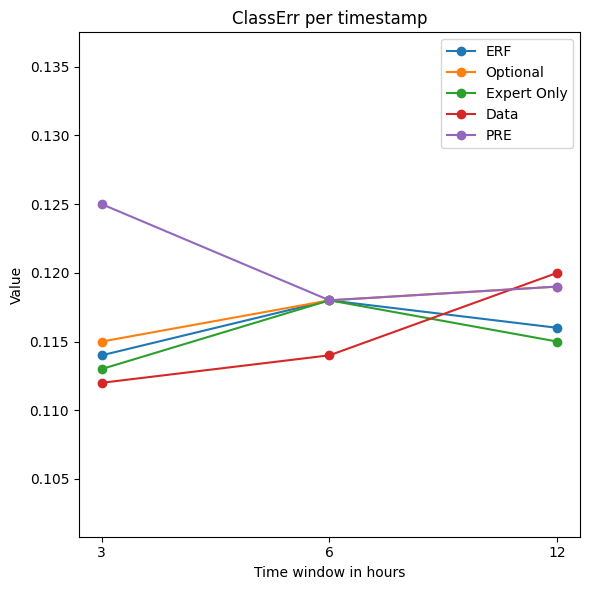

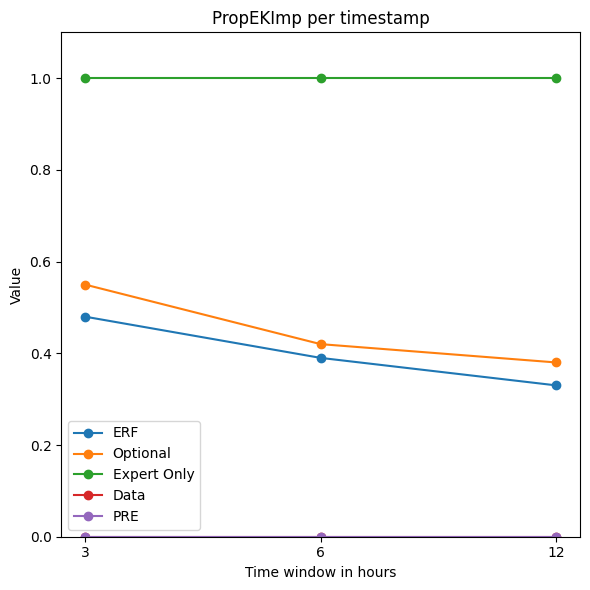

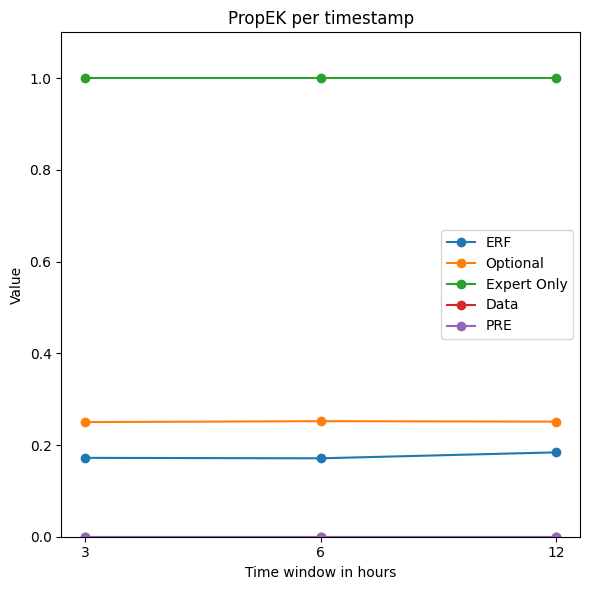

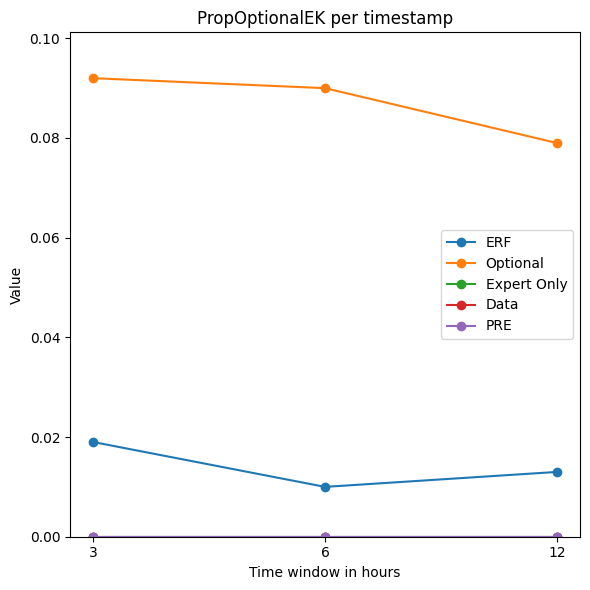

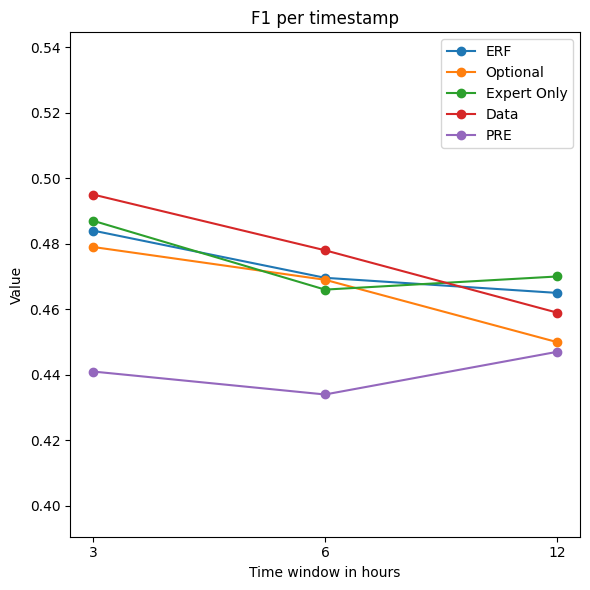

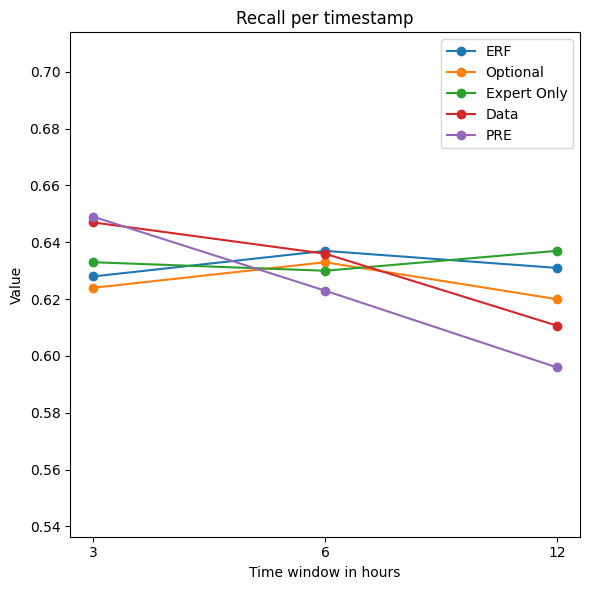

In [ ]:
import matplotlib.pyplot as plt

# Data for the three different time intervals
time_intervals = ['3', '6', '12']

# Define metrics and corresponding values for each method
metrics = {
    'NTerms': {
        'ERF': [85.7, 85.2, 79],
        'Optional': [85.9, 86.9, 81.1],
        'Expert Only': [86.6, 86.7, 79.4],
        'Data': [72.5, 73.2, 69.4],
        'PRE': [21.2, 23.8, 22.4]
    },
    'AvgRuleLength': {
        'ERF': [1.342, 1.399, 1.3994],
        'Optional': [1.344, 1.384, 1.3872],
        'Expert Only': [1.347, 1.407, 1.404],
        'Data': [1.405, 1.497, 1.459],
        'PRE': [2.042, 1.89, 1.84]
    },
    'AUC': {
        'ERF': [0.884, 0.876, 0.8709],
        'Optional': [0.885, 0.875, 0.8712],
        'Expert Only': [0.882, 0.876, 0.8699],
        'Data': [0.887, 0.88, 0.872],
        'PRE': [0.866, 0.853, 0.855]
    },
    # Add other metrics in the same format
    'ClassErr': {
        'ERF': [0.114, 0.118, 0.116],
        'Optional': [0.115, 0.118, 0.119],
        'Expert Only': [0.113, 0.118, 0.115],
        'Data': [0.112, 0.114, 0.12],
        'PRE': [0.125, 0.118, 0.119]
    },
    'PropEKImp': {
        'ERF': [0.48, 0.39, 0.33],
        'Optional': [0.55, 0.42, 0.38],
        'Expert Only': [1.0, 1.0, 1.0],
        'Data': [0, 0, 0],
        'PRE': [0, 0, 0]
    },
    'PropEK': {
        'ERF': [0.172, 0.171, 0.184],
        'Optional': [0.25, 0.252, 0.251],
        'Expert Only': [1.0, 1.0, 1.0],
        'Data': [0, 0, 0],
        'PRE': [0, 0, 0]
    },
    'PropOptionalEK': {
        'ERF': [0.019, 0.01, 0.013],
        'Optional': [0.092, 0.09, 0.079],
        'Expert Only': [0, 0, 0],
        'Data': [0, 0, 0],
        'PRE': [0, 0, 0]
    },
    'F1': {
        'ERF': [0.484, 0.4696, 0.465],
        'Optional': [0.479, 0.469, 0.45],
        'Expert Only': [0.487, 0.466, 0.47],
        'Data': [0.495, 0.478, 0.459],
        'PRE': [0.441, 0.434, 0.447]
    },
    'Recall': {
        'ERF': [0.628, 0.637, 0.631],
        'Optional': [0.624, 0.633, 0.62],
        'Expert Only': [0.633, 0.63, 0.637],
        'Data': [0.647, 0.636, 0.6107],
        'PRE': [0.649, 0.623, 0.596]
    }
}

# Create subplots for each metric
for metric, values in metrics.items():
    plt.figure(figsize=(6, 6))
    plt.title(metric + " per timestamp")
    plt.xlabel('Time window in hours')
    plt.ylabel('Value')

    # Arrange data in the required order (3 hours, 6 hours, 12 hours)
    data_3_hours = [values[method][0] for method in values]
    data_6_hours = [values[method][1] for method in values]
    data_12_hours = [values[method][2] for method in values]

    for method in values:
        method_data = [values[method][0], values[method][1], values[method][2]]
        plt.plot(time_intervals, method_data, marker='o', label=method)

    plt.legend()

    plt.ylim(bottom=min(min(data_3_hours), min(data_6_hours), min(data_12_hours)) * 0.9,
             top=max(max(data_3_hours), max(data_6_hours), max(data_12_hours)) * 1.1)

    plt.tight_layout()
    plt.show()



# Enable data table display

Colab includes the `google.colab.data_table` package that can be used to display Pandas dataframes as an interactive data table (limitations: `max_rows = 20000`, `max_columns = 20`). This is especially useful when exploring the  tables or dictionary from AmsterdamUMCdb. It can be enabled with:

In [ ]:
%load_ext google.colab.data_table

## Set the default query job configuration for google-cloud-bigquery client

# Getting the data you need
The `amsterdamumcdb` package provides the `get_dictionary()` function that returns a DataFrame containing all items and itemids in AmsterdamUMCdb. In combination with BiqQuery DataTables, it's possible to quickly locate an item of interest. Since AmsterdamUMCdb originated from a real Dutch ICU database, the original item names are in Dutch. For common ICU parameters, translations have been provided. Full mapping to [LOINC](https://decor.nictiz.nl/art-decor/loinc) and [SNOMED CT](https://decor.nictiz.nl/art-decor/snomed-ct) is currently in progress, but we are happy to take [pull requests](https://github.com/AmsterdamUMC/AmsterdamUMCdb/pulls) for the [dictionary.csv](https://github.com/AmsterdamUMC/AmsterdamUMCdb/blob/master/amsterdamumcdb/dictionary/dictionary.csv) file, if you have any improvements to the file.

# Load R in - Must run


In [ ]:
# !pip install rpy2

In [ ]:
# Load rpy2 extension
%load_ext rpy2.ipython

# Simulation Data - This is for testing don't run

In [ ]:
%%R

################################################################################
#
#                 (ERF) DATA SIMULATION - AUXILIARY FUNCTIONS
#
################################################################################

# Packages and Libraries

# install.packages("rlist")
# install.packages("purrr")
# library(purrr)
# library(rlist)

################################################################################

# Auxiliary functions

# 1. Generate input data

#' @name sim_data
#' @description Generates random input variables, each with nobs values sampled from N(mu,sigma)
#' @param n_vars number of input variables to be generated
#' @param n_obs number of observations per variable
#' @param mu single number or vector of length n_vars defining the mean of the normal distribution used to generate input variables, default = 0
#' @param sigma standard deviation of normal distribution from which input variable values are sampled, default = 1
#' @return X, a dataframe of random variable values with n_vars columns and n_obs rows

sim_data <- function(n_vars, n_obs, mu, sigma){
  data <- data.frame(matrix(NA, nrow = n_obs, ncol = n_vars))
  for (j in 1:n_vars){
    col = rnorm(n_obs, mu, sigma)
    data[,j] <- col
  }
  data
}

# X <- sim_data(n_vars, n_obs, mu, sigma)

#===============================================================================

# 2. Define relevant linear terms

#' @name sample_lin_preds
#' @description Samples input variables and defines them as relevant linear predictors
#' @param X X, a dataframe of random variable values with n_vars columns and n_obs rows
#' @param n_lin_preds number of input variables to be sampled, default = 5
#' @return a vector of strings including the variable names

sample_lin_preds <- function(X, n_lin_preds){
  colnumbers <- as.vector(1: ncol(X))
  lin_preds_numbers <- sample(colnumbers, size = n_lin_preds, replace = FALSE)
  lin_preds <- c()
  for (i in 1:length(lin_preds_numbers)){
    lin_preds[i] <- paste("X[,",lin_preds_numbers[i], "]", sep = "")
  }
  lin_preds
}

# lin_preds <- sample_lin_preds(X, n_lin_preds)
# lin_preds

#===============================================================================

# 3. Define relevant rules

#' @name sample_rule_vars
#' @description Samples input variables and defines them as the components of relevant predictor rules
#' @param X X, a dataframe of random variable values with n_vars columns and n_obs rows
#' @param n_rule_vars number of input variables to be sampled, default = 20
#' @return vector of strings including the variable names

sample_rule_vars <- function(X, n_rule_vars){
  colnumbers <- as.vector(1: ncol(X))
  rule_vars_numbers <- sample(colnumbers, size = n_rule_vars, replace = FALSE)
  rule_vars <- c()
  for (i in 1:length(rule_vars_numbers)){
    rule_vars[i] <- paste("X[,", rule_vars_numbers[i], "]", sep = "")
  }
  rule_vars
}

# rule_vars <- sample_rule_vars(X, n_rule_vars)
# rule_vars

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @name sample_rule_lengths
#' @description Samples rule lengths ( = number of variables to be included in one rule)
#' @param n_rel_rules number of relevant rules (integer)
#' @param optional_lengths vector ranging from 1 to the max. complexity of relevant predictor rules, default = c(1, 2, 3, 4)
#' @param weights weight vector of same length as 'optional lengths', defining the sampling probability of certain rule lengths, default = c(1/3, 1/4, 1/4, 1/6)
#' @return vector of integers, indicating rule lengths of relevant rules

sample_rule_lengths <- function(n_rel_rules, optional_lengths, weights){
  rule_lengths <- sample(optional_lengths, size = n_rel_rules, prob = weights,
                         replace = TRUE)
  rule_lengths
}

# rule_lengths <- sample_rule_lengths(n_rel_rules, optional_lengths, weights)
# rule_lengths

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @name sample_vars_per_rule
#' @description Defines variables per rule according to defined rule lengths
#' @param n_rel_rules number of relevant rules (integer)
#' @param rule_vars vector of strings including the relevant variable names
#' @param rule_lengths vector of rule lengths
#' @return vector of strings = variables per rule

sample_vars_per_rule <- function(n_rel_rules, rule_vars, rule_lengths){
  var_list <- vector(mode = "list", length = n_rel_rules)
  for (i in 1:n_rel_rules){
    var_list[[i]] <- sample(x = rule_vars, size = rule_lengths[i],
                            replace = FALSE)
  }
  var_list
}

# var_list_rules <- sample_vars_per_rule(n_rel_rules, rule_vars, rule_lengths)
# var_list_rules

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @name sample_signs_per_rule
#' @description Defines inequality signs per rule, sampling options are <=, >=
#' @param n_rel_rules number of relevant rules (integer)
#' @param rule_lengths vector of rule lengths
#' @return vector of inequality sign strings

sample_signs_per_rule <- function(n_rel_rules, rule_lengths){
  signs <- c(">=", "<=")
  sign_list <- vector(mode = "list", length = n_rel_rules)
  for (i in 1:n_rel_rules){
    sign_list[[i]] <- sample(x = signs, size = rule_lengths[i], replace = TRUE)
  }
  sign_list
}

# sign_list_rules <- sample_signs_per_rule(n_rel_rules, rule_lengths)
# sign_list_rules

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @name sample_values_per_rule
#' @description Defines condition values per rule as random samples from same N(mu, sigma) as X was sampled before
#' @param n_rel_rules number of relevant rules (integer)
#' @param rule_lengths vector of rule lengths
#' @param mu single number or vector of length n_vars defining the mean of the normal distribution used to generate input variables
#' @param sigma standard deviation of normal distribution from which input variable values are sampled
#' @return vector of strings, including split point values for prediction rule

sample_values_per_rule <- function(n_rel_rules, rule_lengths, mu, sigma){
  value_list <- vector(mode = "list", length = n_rel_rules)
  for (i in 1:n_rel_rules){
    value_list[[i]] <- as.character(round(rnorm(rule_lengths[i], mu, sigma),2))
  }
  value_list
}

# value_list_rules <- sample_values_per_rule(n_rel_rules, rule_lengths, mu, sigma)
# value_list_rules

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @name define_conditions
#' @description Concatenate the variables, signs and values as a vector of strings
#' @param n_rel_rules number of relevant rules (integer)
#' @param rule_lengths vector of rule lengths
#' @param var_list_rules  vector of variables per rule-strings
#' @param sign_list_rules vector of inequality sign strings
#' @param value_list_rules vector of split point value strings
#' @return vector of strings including all variable-sign-value conditions

define_conditions <- function(n_rel_rules, rule_lengths,
                              var_list_rules, sign_list_rules,
                              value_list_rules){
  all_conditions <- vector(mode = "list", length = n_rel_rules)

  for (i in 1:n_rel_rules){
    conditions_per_rule <- c()
    for (j in 1:rule_lengths[i]){
      conditions_per_rule[j] <- paste(var_list_rules[[i]][j],
                                      sign_list_rules[[i]][j],
                                      value_list_rules[[i]][j], sep = "")
    }
    all_conditions[[i]] <- conditions_per_rule
  }
  all_conditions
}

# conditions <- define_conditions(n_rel_rules, rule_lengths,
#                                var_list_rules, sign_list_rules,
#                                value_list_rules)
# conditions

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @name define_rules
#' @description combines conditions to rules according to defined rule lengths
#' @param n_rel_rules number of relevant rules (integer)
#' @param rule_lengths vector of rule lengths
#' @param conditions vector of strings = variable-sign-value conditions
#' @return vector of strings including prediction rules

define_rules <- function(n_rel_rules, rule_lengths, conditions){
  all_rules <- vector(mode = "list", length = n_rel_rules)

  for (i in 1:n_rel_rules){
    if(rule_lengths[i] == 1){
      rule <- conditions[[i]][1]
    } else if (rule_lengths[i] == 2){
      rule <- paste(conditions[[i]][1], "&", conditions[[i]][2], sep = " ")
    } else if (rule_lengths[i] == 3){
      rule <- paste(conditions[[i]][1], "&", conditions[[i]][2], "&",
                    conditions[[i]][3], sep = " ")
    } else if (rule_lengths[i] == 4){
      rule <- paste(conditions[[i]][1], "&", conditions[[i]][2], "&",
                    conditions[[i]][3], "&", conditions[[i]][4],  sep = " ")
    }
    all_rules[i] <- rule
  }
  unlist(all_rules)
}


# rule_preds <- define_rules(n_rel_rules, rule_lengths, conditions)
# rule_preds

# all_predictors <- unlist(c(rule_preds, lin_preds))
# all_predictors

#===============================================================================

# 4. create X as relevant to the outcome variable

# dt <- createX(X, rule_preds, t = 0.025)
# dt[1]

#===============================================================================

# 5. create model

#' @name sample_betas
#' @description Samples beta coefficient values (in easiest case, all betas are +1)
#' @param all_predictors vector of strings including relevant rules and relevant linear terms
#' @param mu_beta single number or vector of length n_vars defining the mean of the normal distribution(s) from which the betas are sampled
#' @param sigma_beta standard deviation of normal distribution from which the betas are sampled
#' @return vector of numeric values as the coefficient values of all relevant predictors (rules + linear terms)

sample_betas <- function(all_predictors, mu_beta, sigma_beta){
  betas <- rnorm(length(all_predictors), mu_beta, sigma_beta)
  betas
}

# betas <- sample_betas(all_predictors, mu_beta, sigma_beta)
# betas

#===============================================================================

#' @name sample_epsilon
#' @description simulate random noise sampled from a normal distribution
#' @param n_obs  number of observations/examples
#' @param mu_epsilon single number or vector of length n_obs defining the mean of the normal distribution from which random noise is sampled, default = 0
#' @param sigma_epsilon standard deviation of normal distribution from which random noise is sampled, default = 0.025
#' @return vector of numeric values, indicating random noise at each observation


sample_epsilon <- function(n_obs, mu_epsilon, sigma_epsilon){
  epsilon <- rnorm(n_obs, mu_epsilon, sigma_epsilon)
  epsilon
}

# epsilon <- sample_epsilon()
# epsilon

#===============================================================================

# 8. Define y

#' @name calc_linear_predictor
#' @descriptions  calculates the linear predictor per observation
#' @param X a dataframe of  random variable values with n_vars columns and n_obs rows
#' @param betas vector of numeric values as the coefficient values of all relevant predictors
#' @return vector of numeric values as calculated from linear predictor for every observation


calc_linear_predictor <- function(X, betas){
  linear_predictor = c()
  for (i in 1:nrow(X)){
    help = 0
    for(j in 1:ncol(X)){
      help = help + betas[j]*X[i,j]
    }
    linear_predictor[i] = help
  }
  linear_predictor
}

# dt_rules <- dt[2]
# dt_lin <- X[, lin_preds]
# dt_y <- cbind(dt_lin, dt_rules)
# dt_y

# linear_predictor <- calc_linear_predictor(dt_y, betas)
# linear_predictor

# Calculate outcome probabilities (logistic regression)

# y1_prob <- round(1/(1 + exp(-(linear_predictor))),3)
# y1_prob

#===============================================================================

#' @name sample_y
#' @description Calculates outcome classes as a binary response
#' @param y1_prob vector of numeric values indicating positive class probabilities
#' @return vector of numeric class values (binary)

sample_y <- function(y1_prob){
  y <- rep(0, length(y1_prob))
  for(i in 1:length(y1_prob)){
    y[i] <- as.numeric(rbernoulli(1, y1_prob[i]))
  }
  y
}

# y <- sample_y(y1_prob)
# dt_y = cbind(dt_y, y1_prob, y)

#===============================================================================
# 9. Create simulation dataset

# data <- cbind(X, y)

#===============================================================================

In [ ]:
%%R

################################################################################
#
#                           ERF DATA SIMULATION
#
################################################################################

# Packages and Libraries
# .libPaths("C:/Users/ebner/Documents/R/win-library/4.0")
#install.packages("rlist")
#install.packages("purrr")
#install.packages("pre")
#library(pre)
#library(purrr)
#library(rlist)


#' @name create_simulation
#' @description creates a data set including expert knowledge to apply the Expert-RuleFit model to
#' @param n_vars number of input variables to be generated from a (standard) normal distribution, default = 100
#' @param n_obs number of observations/examples, default = 2000
#' @param mu single number or vector of length n_vars defining the mean of the normal distribution used to generate input variables, default = 0
#' @param sigma standard deviation of normal distribution from which input variable values are sampled, default = 1
#' @param n_lin_preds number of relevant linear terms to be sampled, default = 5
#' @param n_rule_vars number of input variables to be sampled for definition of relevant predictor rules, default = 20
#' @param n_rel_rules number of relevant predictor rules, default = 10
#' @param optional_lengths vector ranging from 1 to the max. complexity of relevant predictor rules, default = c(1, 2, 3, 4)
#' @param weights weight vector defining the sampling probability of certain rule lengths, default = c(1/3, 1/4, 1/4, 1/6)
#' @param mu_beta single number or vector of length n_vars defining the mean of the normal distribution(s) from which the betas are sampled, default = 0
#' @param sigma_beta standard deviation of normal distributionfrom which the betas are sampled, default = 5
#' @param mu_epsilon single number or vector of length n_obs defining the mean of the normal distribution from which random noise is sampled, default = 0
#' @param sigma_epsilon standard deviation of normal distribution from which random noise is sampled, default = 0.025
#' @param format TRUE for X[, 2] and FALSE for X2
#' @return a list of the following components:
#'   \item{sim_relevant_data}{dataframe including only the relevant predictor variables and the target y}
##'  \item{sim_full_data}{dataframe including all input variables(all rules and linear terms) and the target y (used to apply ERF)}
##'  \item{expert_knowledge}{list, first element includes specified expert rules, second element includes relevant variables/linear terms}

create_simulation <- function(n_vars = 100, n_obs = 2000,
                              mu = 0, sigma = 1,
                              n_lin_preds = 5,
                              n_rule_vars = 20,
                              n_rel_rules = 10,
                              optional_lengths = c(1, 2),
                              weights = c(1/2, 1/2),
                              mu_beta = 0, sigma_beta = 5,
                              mu_epsilon = 0, sigma_epsilon = 0.025,
                              format = F){

  # 1. Generate input variables x_1,...,x_nvars,
  #    each with n_obs values sampled from N(mu,sigma)
  X <- sim_data(n_vars, n_obs, mu, sigma)

  # 2. Sample input variables and define them as relevant  linear predictors
  lin_preds <- sample_lin_preds(X, n_lin_preds)

  # 3. Define the Rules
  # 3.1. Sample input variables and define them as relevant rule components
  rule_vars <- sample_rule_vars(X, n_rule_vars)

  # 3.2 Sample rule lengths using optional rule lenghts incl. weights
  rule_lengths <- sample_rule_lengths(n_rel_rules, optional_lengths,
                                      weights)

  # 3.3. Sample input variables per rule
  var_list_rules <- sample_vars_per_rule(n_rel_rules, rule_vars, rule_lengths)

  # 3.4. Sample inequality signs per rule
  sign_list_rules <- sample_signs_per_rule(n_rel_rules, rule_lengths)

  # 3.5. Define condition values per rule, each as a random sample
  #      from N(mu,sigma)
  value_list_rules <- sample_values_per_rule(n_rel_rules,
                                             rule_lengths, mu, sigma)

  # 3.6. Concatenate the variables, signs and values as condition strings
  conditions <- define_conditions(n_rel_rules, rule_lengths,
                                  var_list_rules, sign_list_rules,
                                  value_list_rules)

  # # 4. Define all relevant predictors (rules + linear terms)
  rule_preds <- define_rules(n_rel_rules, rule_lengths, conditions)
  all_predictors <- unlist(c(rule_preds, lin_preds))

  # 5. createX as relevant to the outcome variable
  dt <- createX(X, rule_preds, t = 0.025)

  ## 6. Sample the betas
  betas <- sample_betas(all_predictors, mu_beta, sigma_beta)

  # 7. Sample random noise
  epsilon <- sample_epsilon(n_obs, mu_epsilon, sigma_epsilon)

  # 8. Calculate the outcome probabilities while adding random noise
  dt_rules <- dt[1]
  lins <- gsub("\\[|\\,|\\]", "", lin_preds)
  dt_lin <- X[, lins]
  dt_y <- cbind(dt_rules, dt_lin)
  linear_predictor <- calc_linear_predictor(dt_y, betas)
  y1_prob <- round(1/(1 + exp(-(linear_predictor))),3)

  # Sample binary class outcome from Bernoulli distirbution with prob = y1_prob
  y <- sample_y(y1_prob)

  # Define dataset with all relevant predictor variables, y1_prob and y
  sim_relevant_data = cbind(dt_y, y1_prob, y)
  sim_relevant_data$y <- factor(sim_relevant_data$y)

  # Define full dataset inkl. y
  sim_full_data <- cbind(X, y)
  sim_full_data$y <- factor(sim_full_data$y)
  expert_knowledge <- list()
  if(format == T){
    expert_knowledge[[1]] <- rule_preds
    expert_knowledge[[2]] <- gsub("\\[|\\,|\\]|X", "", lin_preds)
  } else{
    expert_knowledge[[1]] <- rule_preds
    expert_knowledge[[2]] <- lin_preds
  }

  out = list(sim_relevant_data, sim_full_data, expert_knowledge)

  out
}

#===============================================================================

# Example
#simulation <- create_simulation(n_vars = 20, n_obs = 200,
#                                 mu = 0, sigma = 1,
#                                 n_lin_preds = 3,
#                                 n_rule_vars = 10,
#                                 n_rel_rules = 5,
#                                 optional_lengths = c(1, 2, 3, 4),
#                                 weights = c(1/3, 1/4, 1/4, 1/6),
#                                 mu_beta = 0, sigma_beta = 5,
#                                 mu_epsilon = 0, sigma_epsilon = 0.025,
#                                 format = T)


# Dataset of relevant predictors + y
#rel_predictor_data <- simulation[[1]]


# Data to apply Expert-RuleFit to
#data <- simulation[[2]]


# Expert knowledge
#expert_knowledge <- simulation[[3]]
#expert_rules <- expert_knowledge[[1]]
#relevant_lins <- expert_knowledge[[2]]


# Export Packages - You don't need to run these, I already did

In [ ]:
%%R

# #library() # Check what packages are already installed
# .libPaths("library")

# # List of R package names to install
# packages_to_install <- #c("gbm", "inTrees", "randomForest", "pROC", "MASS", "bayesm", "glmnet", 'coefplot', 'purrr', 'rlist','tidyverse','caret','mlbench','Metrics')

# # Function to check if a package is installed
# is_installed <- function(pkg) {
#   return(pkg %in% rownames(installed.packages()))
# }

# # Install missing packages
# for (pkg in packages_to_install) {
#   if (!is_installed(pkg)) {
#     install.packages(pkg, quiet = TRUE)  # Suppress installation progress
#     if (is_installed(pkg)) {
#       cat(paste(pkg, "has been installed successfully.\n"))
#     } else {
#       cat(paste("Installation of", pkg, "failed.\n"))
#     }
#   } else {
#     cat(paste(pkg, "is already installed.\n"))
#   }
# }


install.packages("unbalanced")
 # ------> If we need to install a package later on

(as ‘lib’ is unspecified)



In [ ]:
%%R
.libPaths("library")

In [ ]:
%%R
.libPaths()

[1] "/usr/local/lib/R/site-library" "/usr/lib/R/site-library"      
[3] "/usr/lib/R/library"           


In [ ]:
%ls "/usr/local/lib/R/site-library/"

IRdisplay/  IRkernel/  pbdZMQ/  repr/


In [ ]:
%%R
tar("library.tar_xr.gz", "/usr/local/lib/R/site-library")

In [ ]:
%%R
library(xrf)

In [ ]:
%ls /content/drive/MyDrive/MLRH/R_packages

library.tar_all.gz   library.tar_aux.gz   library.tar_mo.gz      library.tar_rcurl.gz
library.tar_aux2.gz  library.tar_mice.gz  library.tar_ranger.gz  library.tar_xrf.gz


In [ ]:
%cp library.tar.gz /content/drive/MyDrive/MLRH/R_packages

cp: cannot stat 'library.tar_roc.gz': No such file or directory


In [ ]:
!du -sh library.tar.gz

1.2M	library.tar.gz


In [ ]:
%%R


# List of R package names to install
packages_to_install <- c("pre",'xrf', 'pROC', 'ROCit', 'ROCR', 'cvAUC','ROSE')#c("gbm", "inTrees", "randomForest", "pROC", "MASS", "bayesm", "glmnet", 'coefplot', 'purrr', 'rlist','tidyverse','caret','mlbench','Metrics')

# Function to check if a package is installed
is_installed <- function(pkg) {
  return(pkg %in% rownames(installed.packages()))
}

# Install missing packages
for (pkg in packages_to_install) {
  if (!is_installed(pkg)) {
    install.packages(pkg, quiet = TRUE)  # Suppress installation progress
    if (is_installed(pkg)) {
      cat(paste(pkg, "has been installed successfully.\n"))
    } else {
      cat(paste("Installation of", pkg, "failed.\n"))
    }
  } else {
    cat(paste(pkg, "is already installed.\n"))
  }
}


pre has been installed successfully.


xrf has been installed successfully.
pROC is already installed.
ROCit has been installed successfully.


ROCR has been installed successfully.
cvAUC has been installed successfully.
ROSE has been installed successfully.


# Import packages - Must Run

These functions import the packages I already installed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I am not sure whether this will work, if not run this else you can skip this.

In [ ]:
# %%R

# # # Install packages from the .tar.gz files
# install.packages("/content/drive/MyDrive/MLRH/R_packages/library.tar_all.gz", repos = NULL, type = "source")
# install.packages("/content/drive/MyDrive/MLRH/R_packages/library.tar_mo.gz", repos = NULL, type = "source")
# install.packages("/content/drive/MyDrive/MLRH/R_packages/library.tar_mice.gz", repos = NULL, type = "source")


In [ ]:
%cp drive/MyDrive/MLRH/R_packages/library.tar_all.gz .
!du -sh library.tar_all.gz
%cp drive/MyDrive/MLRH/R_packages/library.tar_mice.gz .
!du -sh library.tar_mice.gz
%cp drive/MyDrive/MLRH/R_packages/library.tar_mo.gz .
!du -sh library.tar_mo.gz
%cp drive/MyDrive/MLRH/R_packages/library.tar_ranger.gz .
!du -sh library.tar_ranger.gz
%cp drive/MyDrive/MLRH/R_packages/library.tar_aux.gz .
!du -sh library.tar_aux.gz
%cp drive/MyDrive/MLRH/R_packages/library.tar_aux2.gz .
!du -sh library.tar_aux2.gz
%cp drive/MyDrive/MLRH/R_packages/library.tar_rcurl.gz .
!du -sh library.tar_rcurl.gz
%cp drive/MyDrive/MLRH/R_packages/library.tar_xrf.gz .
!du -sh library.tar_xrf.gz

326M	library.tar_all.gz
150M	library.tar_mice.gz
279M	library.tar_mo.gz
1.2M	library.tar_ranger.gz
1.2M	library.tar_aux.gz
1.2M	library.tar_aux2.gz
3.4M	library.tar_rcurl.gz
1.2M	library.tar_xrf.gz


In [ ]:
!tar xf library.tar_all.gz
!tar xf library.tar_mice.gz
!tar xf library.tar_mo.gz
!tar xf library.tar_ranger.gz
!tar xf library.tar_aux.gz
!tar xf library.tar_rcurl.gz
!tar xf library.tar_aux2.gz
!tar xf library.tar_xrf.gz

tar: Removing leading `/' from member names
tar: Removing leading `/' from member names
tar: Removing leading `/' from member names
tar: Removing leading `/' from member names
tar: Removing leading `/' from member names
tar: Removing leading `/' from member names
tar: Removing leading `/' from member names
tar: Removing leading `/' from member names


In [ ]:
%ls usr/local/lib/R/site-library/

abind/       e1071/         ipred/      Metrics/       plotly/         repr/      useful/
ape/         foreach/       IRdisplay/  mice/          plyr/           reshape2/  vegan/
arules/      future/        IRkernel/   minqa/         pROC/           rgl/       viridis/
assertthat/  future.apply/  iterators/  mitml/         prodlim/        rlist/     wk/
bayesm/      gbm/           jomo/       mlbench/       progressr/      RRF/       xgboost/
bitops/      geometry/      jpeg/       ModelMetrics/  promises/       RRPP/      XML/
caret/       geomorph/      later/      Momocs/        proxy/          s2/        xtable/
classInt/    glmnet/        lava/       nloptr/        randomForest/   sf/        xts/
clock/       globals/       lazyeval/   numDeriv/      Rcpp/           shape/     zoo/
coefplot/    gower/         linprog/    ordinal/       RcppArmadillo/  sp/
crosstalk/   gridExtra/     listenv/    pan/           RcppEigen/      SQUAREM/
dendextend/  hardhat/       lme4/       paralle

In [ ]:
%%R
.libPaths('usr/local/lib/R/site-library/')

In [ ]:
%%R
.libPaths()

[1] "/content/usr/local/lib/R/site-library"
[2] "/usr/local/lib/R/site-library"        
[3] "/usr/lib/R/site-library"              
[4] "/usr/lib/R/library"                   


In [ ]:
%%R
library(xrf) # Test


Error in library(xrf) : there is no package called ‘xrf’


# ERF main Function - Must run


In [ ]:
%%R

################################################################################
################################################################################
###                                                                          ###
###                         EXPERT RULE FIT (ERF)                            ###
###                                                                          ###
################################################################################
################################################################################

# Libraries

library(gbm)
library(inTrees)
library(randomForest)
library(pROC)
library(MASS)
library(bayesm)
library(glmnet)
library(coefplot)
library(purrr)
library(rlist)
library(tidyverse)
library(caret)
library(mlbench)
library(Metrics)



# THE EXPERT RULEFIT IMPLEMENTATION

#' @title ExpertRuleFit
#' @description fits the Expert RuleFit model described in the MSc. Thesis "Complementing Prediction Rule Ensembles with Expert Knowledge" based on the RuleFit model of Friedman and Popescu.
#' @param X specifies a matrix containing the predictor attributes.
#' @param y specifies a vector containing the binary response attribute.
#' @param Xtest specifies a matrix containing the predictor attributes of the test set.
#' @param ytest specifies a vector containing the binary response attribute.
#' @param intercept specifies whether to include an intercept (highly recommended).
#' @param optional_expert_rules specifies a character vector of expert-derived rules to be included to  the  set  of  data-generated  rules  as  candidate  base  classifiers  for  the  final model.
#' @param confirmatory_expert_rules specifies a character vector of expert-derived rules to certainly be included as base classifiers in the final model. No penalty will be applied to the respective coefficients, which will yield a non-zero coefficient for the rule in the final model.
#' @param expert_linear_terms specifies a character vector of expert-derived predictor attributes to be included as candidate base learners in the prediction model.
#' @param confirmatory_linear_terms specifies a character vector of expert-derived predictor attributes to certainly be included as base learners in the final model. No penalty will be applied to the respective coefficients, which will yield a non-zero coefficient for the linear term in the final model.
#' @param optional_penalty specifies the penalty factor applied to all optional_expert_rules and optional_linear_terms as a real value between 0 and 1.  May be used toprevent preference for data rules whose predictive relevance may partly resultfrom modeling noise in the data set.
#' @param expert_only specifies whether ONLY Expert rules and -linear terms should be included as candidates to the final model.
#' @param ntree specifies the number of trees in the ensemble step from which data rules are extracted.
#' @param ensemble specifies whether gradient boosting ("GBM"), random forest ("RF") or a mixture of both ("both") shall be employed to generate the tree ensemble.
#' @param mix specifies that mix*ntree trees are generated via random forest and (1-mix)*ntree trees via gradient boosting whenever ensemble is set to "both".
#' @param L controls the complexity of the generated rules whereby higher values lead to more complex rules.
#' @param S controls the minimum number of observations in the tree growing process.
#' @param minsup specifies the minimum value of support such that rules with support < minsup are removed. Higher values can be used to prevent overfitting.
#' @param corelim specifies the minimum value of correlation where correlated rules are cleaned.
#' @param alpha specifies the elastic-net mixing parameter with values between 0 and 1, where 1 represents the lasso penalty, and 0 the ridge penalty.
#' @param s see function glmnet: lambda.min, lambda.1se or "none" for no penalization
#' @param standardize see function glmnet
#' @param n_imp specifies the number of features (rules + linear terms) to be printed as most important features.
#' @param print_output controls whether the elements of the function output are additionally printed to the console.
#' @return An object of class ExpertRuleFit, which is a list of the following components:
#'   \item{Train}{returns a large data frame as the result of the Combined Rule Generation within the ERF model applied to the training data. The same contains as columns an intercept, standardized expert linear terms, data rules and expert rules.  Only the data rules are mandatory, the remaining elements are optional.}
##'  \item{Model}{returns a data frame, which lists the base classifiers in the final model together with their corresponding coefficients.}
##'  \item{Features}{returns a character vector including first all linear terms and then allrules as base classifiers in the final model.}
##'  \item{Coefficients}{returns a vector including the coefficients of all base classifiersin the final prediction model.}
##'  \item{Nterms}{returns the number of base classifiers in the final model as an indicator of model complexity.}
##'  \item{AvgRuleLength}{returns the average lengths of all rules included in the final prediction model.}
##'  \item{ImportantFeatures}{returns a character vector including the n_imp most important ensemble learners (features) according to the absolute value of their respective coefficients.}
##'  \item{ImportantEK}{returns a character vector including the optional and confirmatory expert knowledge among the ImportantFeatures.}
##'  \item{PropEKImp}{returns the proportion (real value) of EK among the ImportantFeatures.}
##'  \item{OptionalEK}{returns a character vector including all optional EK (rules and lin-ear terms) included in the final model.}
##'  \item{ConfirmatoryEK}{returns a character vector including all confirmaotry EK (rulesand linear terms) included in the final model.}
##'  \item{RemovedEK}{returns a character vector including those EK terms that were re-moved due to too low support or too high correlation with other expert- or data rules.}
##'  \item{PropOptionalEK}{returns a numeric value between 0 and 1 indicating the pro-portion of optional EK included in the final model.}
##'  \item{PropEK}{returns a numeric value between 0 and 1 indicating the proportion ofEK of any kind included in the final model.}
##'  If Xtest is not NULL, additional list elements are:
##'  \item{Test}{returns a large data frame as the result of Combined Rule Generation Stage within the ERF model applied to the test data.  The same contains as columns an intercept, standardized expert linear terms, data rules and expert rules. Only the data rules are mandatory, the remaining elements are optional.}
##'  \item{Predictions}{returns a binary vector of target predictions for the observations in the test set.}
##'  \item{ConfusionMatrix}{returns a confusion matrix indicating predictive performance on the test set.}
##'  \item{AUC}{returns the Area Under the Curve. Values close to 1 indicate high predictive accuracy whereas values close to 0.5 indicate an uninformative classifier.}
##'  \item{ClassErr}{returns the classification error evaluated on the test set.}


ExpertRuleFit = function(X=NULL, y=NULL, Xtest=NULL, ytest=NULL, intercept=T,
                         optional_expert_rules = NULL, confirmatory_expert_rules = NULL,
                         optional_linear_terms=NULL, confirmatory_linear_terms = NULL,
                         expert_only = F, optional_penalty = 1, ntree=250,
                         ensemble= "GBM", mix=0.5, L=3, S=6, minsup=.025, corelim = 1,
                         alpha = 0.9, s = "lambda.1se", standardize = F,
                         n_imp = 10, print_output = T) {


  print('it begins')

  # combine optional and confirmatory EK
  all_expert_rules <- c(optional_expert_rules, confirmatory_expert_rules)
  all_linear_terms <- c(optional_linear_terms, confirmatory_linear_terms)


  # function input checks
  if((is.matrix(X)|is.data.frame(X))==F){
    stop("X must be a matrix or data frame.")
  }

  if((!is.factor(y))){
    stop("y is not a (binary) factor. Currently only (binary) classification is supported.")
  }

  if(!(is.null(Xtest))){
    if(dim(X)[2]!= dim(Xtest)[2]){
      stop("The dimensionality between X and Xtest differs.")
    }
  }

  if(is.null(ytest)==F){
    if(mode(y)!=mode(ytest)){
      stop("The mode of y and ytest differs.")
    }
  }

  if(!(is.null(all_expert_rules))){
      all_expert_rules <- names_to_positions(X, all_expert_rules)
  }

  if(!(is.null(optional_expert_rules))){
      optional_expert_rules <- names_to_positions(X, optional_expert_rules)
  }

  if(!(is.null(confirmatory_expert_rules))){
      confirmatory_expert_rules <- names_to_positions(X, confirmatory_expert_rules)
  }

  if(!(is.null(all_linear_terms))){
    all_linear_terms <- names_to_numbers(X, all_linear_terms)
    for(l in 1:length(all_linear_terms)){
      if(is.numeric(X[,all_linear_terms[l]])==F){
        stop(sprintf("Variable %i is not numeric and can not be included as
                     linear term. Please check the variable.",l))
      }
    }
  }

  if(!(is.null(optional_linear_terms))){
    optional_linear_terms <- names_to_numbers(X, optional_linear_terms)
    optional_linear_terms <- paste("X[,",optional_linear_terms, "]", sep = "")
  }



  if(!(is.null(confirmatory_linear_terms))){
    confirmatory_linear_terms <- names_to_numbers(X, confirmatory_linear_terms)
    confirmatory_linear_terms <- paste("X[,",confirmatory_linear_terms, "]", sep = "")
  }


  if(ntree<2){
    stop("Too few trees are chosen for ExpertRuleFit.")
  }


  if((mix<0)|(mix>=1)){
    stop("invalid choice for mix, please chose a value between 0 and 1.")
  }

  if(L<2){
    stop("Parameter L needs to be >=2.")
  }

  if(S<1){
    stop("Parameter S needs to be >=1.")
  }

  if((minsup<0)|(minsup>=1)){
    stop("invalid choice for minimum support, please chose a
         value between 0 and 1.")
  }


  if(is.logical(intercept)==F){
    stop("Invalid intercept choice. Must be TRUE or FALSE.")
  }


  if((alpha<0)|(alpha>1)){
    stop("invalid choice for alpha, please chose a value between 0 and 1.")
  }


  if(is.logical(print_output)==F){
    stop("Invalid choice regarding output print. Must be TRUE or FALSE.")
  }

  N = length(y)

  if(expert_only == T){
    dt = createX(X = X, rules = all_expert_rules, t = 0, corelim = 1)
    Xr = dt[[1]]
    rulesFin = dt[[2]]
  }else{
    if (ensemble == "RF") {
      capture.output(rulesf <- genrulesRF(X, y, nt=ntree, S=S, L=L))
    } else if (ensemble == "GBM") {
      capture.output(rulesf <- genrulesGBM(X, y, nt=ntree,S=S, L=L))
    } else if (ensemble == "both"){
      capture.output(rules1 <- genrulesRF(X, y, nt=round(ntree*mix),
                                          S=S, L=L))
      capture.output(rules2 <- genrulesGBM(X, y, nt=round(ntree*(1-mix)),
                                           S=S, L=L))
      rulesf = c(rules1, rules2)
    } else {
      print("invalid Tree ensemble choice")
    }

    # add expert rules to rule ensemble if present
    if(!(is.null(all_expert_rules))){
      rulesf <- c(rulesf, all_expert_rules)
    }

    dt = createX(X = X, rules = rulesf, t = minsup, corelim = corelim)
    Xr = dt[[1]]
    rulesFin = dt[[2]]
  }


  if (!(is.null(all_expert_rules))){
    removed_expertrules <- c()
    for (i in 1:length(all_expert_rules)){
      if(!(all_expert_rules[i] %in% rulesFin)){
        removed_expertrules <- c(removed_expertrules, all_expert_rules[i])
      }
    }
    removed_expertrules
  } else{
    removed_expertrules <- NULL
  }


  # standardize linear terms
  sdl=0
  mul=0

  if(length(all_linear_terms)>1){
    mul = apply(X[,all_linear_terms], 2, mean)
    sdl = apply(X[,all_linear_terms], 2, sd)
    for(l in 1:length(all_linear_terms)){
      X[,all_linear_terms[l]] = 0.4*((X[,all_linear_terms[l]]-mul[l])/sdl[l])
    }
  } else if(length(all_linear_terms)==1){
    mul = mean(X[,all_linear_terms])
    sdl = sd(X[,all_linear_terms])
    X[,all_linear_terms] = 0.4*((X[,all_linear_terms] - mul)/sdl)
  }

  # add linear terms and intercept (optional) to rule matrix Xt
  if(is.null(all_linear_terms)){
    if(intercept==TRUE){
      Xt = as.data.frame(cbind(rep(1, times= dim(Xr)[1]),Xr))
    } else{
      Xt = as.data.frame(Xr)
    }
  } else{
    if(intercept==TRUE){
      Xt = as.data.frame(cbind(rep(1, times=dim(X)[1]), X[,all_linear_terms], Xr))
    } else{
      Xt = as.data.frame(cbind(X[,all_linear_terms], Xr))
    }
  }



  # change column names: intercept = X0, linear terms = X1,...Xp, rules as specified conditions
  if((intercept == TRUE) & (!(is.null(all_linear_terms)))){
    colnames(Xt)[1] <- "Intercept"
    colnames(Xt)[2:(length(all_linear_terms)+1)] <- paste("X[,",all_linear_terms, "]", sep = "")
    colnames(Xt)[(length(all_linear_terms)+2): ncol(Xt)] <- rulesFin
  } else if ((intercept == TRUE) & (is.null(all_linear_terms))){
    colnames(Xt)[1] <- "Intercept"
    colnames(Xt)[2: ncol(Xt)] <- rulesFin
  } else if ((intercept == FALSE) & (!(is.null(all_linear_terms)))){
    colnames(Xt)[1:length(all_linear_terms)] <- paste("X[,",all_linear_terms, "]", sep = "")
    colnames(Xt)[(length(all_linear_terms)+1): ncol(Xt)] <- rulesFin
  } else{
    colnames(Xt) <- rulesFin
  }


  # get the column indices of the confirmatory terms
  if((!(is.null(confirmatory_expert_rules))) & (!(is.null(confirmatory_linear_terms)))){
    confirmatory_terms <- c(confirmatory_expert_rules, confirmatory_linear_terms)
  } else if ((is.null(confirmatory_expert_rules)) & (!(is.null(confirmatory_linear_terms)))){
    confirmatory_terms <- confirmatory_linear_terms
  } else if ((!(is.null(confirmatory_expert_rules))) & (is.null(confirmatory_linear_terms))){
    confirmatory_terms <- confirmatory_expert_rules
  } else {
    confirmatory_terms <- NULL
  }

  if(!(is.null(confirmatory_terms))){
    confirmatory_cols <- c()
    for(i in 1: length(confirmatory_terms)){
      if(confirmatory_terms[i] %in% colnames(Xt)){
        confirmatory_cols <- c(confirmatory_cols, which(colnames(Xt) == confirmatory_terms[i]))
      }
    }
  } else{
    confirmatory_cols <- NULL
  }


  # get the column indices of the optional terms
  if((!(is.null(optional_expert_rules))) & (!(is.null(optional_linear_terms)))){
    optional_terms <- c(optional_expert_rules, optional_linear_terms)
  } else if ((is.null(optional_expert_rules)) & (!(is.null(optional_linear_terms)))){
    optional_terms <- optional_linear_terms
  } else if ((!(is.null(optional_expert_rules))) & (is.null(optional_linear_terms))){
    optional_terms <- optional_expert_rules
  } else {
    optional_terms <- NULL
  }

  if(!(is.null(optional_terms))){
    optional_cols <- c()
    for(i in 1: length(optional_terms)){
      if(optional_terms[i] %in% colnames(Xt)){
        optional_cols <- c(optional_cols, which(colnames(Xt) == optional_terms[i]))
      }
    }
  } else{
    optional_cols <- NULL
  }



  if(is.null(Xtest) == T){
    regmodel = regularized_regression(X=Xt, y=y, Xtest = NULL, ytest =NULL,
                                      s = s,
                                      confirmatory_cols = confirmatory_cols,
                                      optional_cols = optional_cols,
                                      optional_penalty = optional_penalty,
                                      alpha = alpha, standardize = standardize,
                                      n = n_imp,
                                      print_output = print_output)






    # EK INFO
    # all ensemble members (rules + linear terms)
    model_features <- regmodel$Results$features

    # the n_imp most important ensemble members (=features)
    imp_features <- regmodel$ImpFeatures

    # optional EK among the most important features
    opt_ek <- c(optional_expert_rules, optional_linear_terms)
    opt_ek_imp <- contains(opt_ek, imp_features)

    # Expert rules removed due to too low/high support on data
    opt_er_names <- positions_to_names(X, optional_expert_rules)
    unsup_er <- support_remove(opt_er_names, rbind.data.frame(X,y), minsup)
    unsup_er <- names_to_positions(X, unsup_er)

    removed_as_unsup <- contains(unsup_er, removed_expertrules)
    removed_as_corr <- setdiff(removed_expertrules, removed_as_unsup)


    # confirmatory EK among the most important features
    conf_ek <- c(confirmatory_expert_rules, confirmatory_linear_terms)
    conf_ek_imp <- contains(conf_ek, imp_features)

    # proportion of EK among most imp. features
    prop_ek_imp <- length(c(opt_ek_imp, conf_ek_imp))/n_imp

    # optional EK in the final model
    opt_ek_in <- contains(opt_ek, model_features)

    # confirmatory EK in the final model
    conf_ek_in <- contains(conf_ek, model_features)

    # all EK in the final model
    all_ek_in <- c(opt_ek_in, conf_ek_in)


    # proportion of optional EK/EK among all EK/all features
    prop_opt_ek <- length(opt_ek_in)/(regmodel$NTerms)
    prop_all_ek <- length(all_ek_in)/(regmodel$NTerms)


    if(print_output == T){
      reg_info <- regression_output(X, Xtest = NULL, regmodel)
      exp_info <- expert_output(X = X, opt_ek_imp = opt_ek_imp, conf_ek_imp = conf_ek_imp,
                                n_imp = n_imp, prop_ek_imp = prop_ek_imp,
                                opt_ek_in = opt_ek_in, conf_ek_in = conf_ek_in,
                                removed_as_unsup = removed_as_unsup,
                                removed_as_corr = removed_as_corr,
                                prop_opt_ek = prop_opt_ek, prop_all_ek = prop_all_ek)
      output <- list(reg_info, exp_info)

    }


    regmodel$Results$features <- positions_to_names(X, regmodel$Results$features)
    regmodel$ImpFeatures <- positions_to_names(X, regmodel$ImpFeatures)
    importantek <- positions_to_names(X, c(opt_ek_imp, conf_ek_imp))
    opt_ek_in <- positions_to_names(X, opt_ek_in)
    conf_ek_in <- positions_to_names(X, conf_ek_in)
    removedek <- positions_to_names(X, c(removed_as_unsup, removed_as_corr))

    out = list(Train = Xt ,
            Model = regmodel$Results,
            Features = regmodel$Results$features,
            Coefficients = regmodel$Results$coefficients,
            NTerms = regmodel$NTerms,
            AvgRuleLength = regmodel$AvgRuleLength,
            ImportantFeatures = regmodel$ImpFeatures,
            ImportantEK = importantek,
            PropEKImp = prop_ek_imp,
            OptionalEK = opt_ek_in,
            ConfirmatoryEK = conf_ek_in,
            RemovedEK = removedek,
            PropOptionalEK = prop_opt_ek,
            PropEK = prop_all_ek)

    # give training data original column names
    colnames(out$Train) <- positions_to_names(X, colnames(out$Train))


  }else{

    #create rules.
    Xrt = createXtest(Xtest, rulesFin)

    ##preparing test data set. Standardize linear terms Xtest
    if(!(is.null(all_linear_terms))){
      for(l in 1:length(all_linear_terms)){
        Xtest[,all_linear_terms[l]] = 0.4*((Xtest[,all_linear_terms[l]]-mul[l])/sdl[l])
      }
    }

    #combine to data frame
    if(is.null(all_linear_terms)){
      if(intercept==TRUE) {
        X_test = as.data.frame(cbind(rep(1, times = dim(Xrt)[1]), Xrt))
      }else{X_test = Xrt}
    } else {
      if(intercept==TRUE) {
        X_test = as.data.frame(cbind(rep(1, times = dim(Xrt)[1]), Xtest[,all_linear_terms], Xrt))
      }else{
        X_test = as.data.frame(cbind(Xtest[,all_linear_terms], Xrt))
      }
    }


    # adapt column names
    if((intercept == TRUE) & (!(is.null(all_linear_terms)))){
      colnames(X_test)[1] <- "Intercept"
      colnames(X_test)[2:(length(all_linear_terms)+1)] <- paste("X[,",all_linear_terms, "]", sep = "")
      colnames(X_test)[(length(all_linear_terms)+2): ncol(X_test)] <- rulesFin
    } else if ((intercept == TRUE) & (is.null(all_linear_terms))){
      colnames(X_test)[1] <- "Intercept"
      colnames(X_test)[2: ncol(X_test)] <- rulesFin
    } else if (intercept == FALSE & (!(is.null(all_linear_terms)))){
      colnames(X_test)[1:length(all_linear_terms)] <- paste("X[,",all_linear_terms, "]", sep = "")
      colnames(X_test)[(length(all_linear_terms)+1): ncol(X_test)] <- rulesFin
    } else{
      colnames(X_test) <- rulesFin
    }

    #if(expert_only == T){
      #print(colnames(X_test))
      #keep_all <- c(all_expert_rules, optional_linear_terms, confirmatory_linear_terms)
      #print(keep_all)
      #keep_in <- names(X_test)[(names(X_test) %in% keep_all)]
      #print(keep_in)
      #X_test <- subset(X_test, select = keep_in)
    #}


    # add prediction and error to model output
    regmodel = regularized_regression(X = Xt, y = y, Xtest = X_test,
                                      ytest = ytest,
                                      s = s,
                                      confirmatory_cols = confirmatory_cols,
                                      optional_cols = optional_cols,
                                      optional_penalty = optional_penalty,
                                      alpha = alpha,
                                      standardize = standardize, n = n_imp,
                                      print_output = print_output)



    print('checkpoint 1')

    # EK INFO

    # all ensemble members (rules + linear terms)
    model_features <- regmodel$Results$features

    # the n_imp most important ensemble members (=features)
    imp_features <- regmodel$ImpFeatures

    # optional EK among the most important features
    opt_ek <- c(optional_expert_rules, optional_linear_terms)
    opt_ek_imp <- contains(opt_ek, imp_features)

    # Expert rules removed due to too low/high support on data
    opt_er_names <- positions_to_names(X, optional_expert_rules)
    unsup_er <- support_remove(opt_er_names, rbind.data.frame(X,y), minsup)
    unsup_er <- names_to_positions(X, unsup_er)

    removed_as_unsup <- contains(unsup_er, removed_expertrules)
    removed_as_corr <- setdiff(removed_expertrules, removed_as_unsup)


    # confirmatory EK among the most important features
    conf_ek <- c(confirmatory_expert_rules, confirmatory_linear_terms)
    conf_ek_imp <- contains(conf_ek, imp_features)

    # proportion of EK among most imp. features
    prop_ek_imp <- length(c(opt_ek_imp, conf_ek_imp))/n_imp

    # optional EK in the final model
    opt_ek_in <- contains(opt_ek, model_features)

    # confirmatory EK in the final model
    conf_ek_in <- contains(conf_ek, model_features)

    # all EK in the final model
    all_ek_in <- c(opt_ek_in, conf_ek_in)


    # proportion of optional EK/EK among all EK/all features
    prop_opt_ek <- length(opt_ek_in)/(regmodel$NTerms)
    prop_all_ek <- length(all_ek_in)/(regmodel$NTerms)


    if(print_output == T){
      reg_info <- regression_output(X, Xtest, regmodel)
      exp_info <- expert_output(X = X, opt_ek_imp = opt_ek_imp, conf_ek_imp = conf_ek_imp,
                                n_imp = n_imp, prop_ek_imp = prop_ek_imp,
                                opt_ek_in = opt_ek_in, conf_ek_in = conf_ek_in,
                                removed_as_unsup = removed_as_unsup,
                                removed_as_corr = removed_as_corr,
                                prop_opt_ek = prop_opt_ek, prop_all_ek = prop_all_ek)
      output <- list(reg_info, exp_info)

    }

    print('checkpoint 2')

    regmodel$Results$features <- positions_to_names(X, regmodel$Results$features)
    regmodel$ImpFeatures <- positions_to_names(X, regmodel$ImpFeatures)
    importantek <- positions_to_names(X, c(opt_ek_imp, conf_ek_imp))
    opt_ek_in <- positions_to_names(X, opt_ek_in)
    conf_ek_in <- positions_to_names(X, conf_ek_in)
    removedek <- positions_to_names(X, c(removed_as_unsup, removed_as_corr))

    out = list(Train = Xt,
            Test = X_test,
            Model = regmodel$Results,
            Features = regmodel$Results$features,
            Coefficients = regmodel$Results$coefficients,
            NTerms = regmodel$NTerms,
            Predictions = regmodel$Predictions,
            AvgRuleLength = regmodel$AvgRuleLength,
            ConfusionMatrix = regmodel$ConfusionMatrix,
            AUC = regmodel$AUC,
            ClassErr = regmodel$CE,
            ImportantFeatures = regmodel$ImpFeatures,
            ImportantEK = importantek,
            PropEKImp = prop_ek_imp,
            OptionalEK = opt_ek_in,
            ConfirmatoryEK = conf_ek_in,
            RemovedEK = removedek,
            PropOptionalEK = prop_opt_ek,
            PropEK = prop_all_ek)

    # change column names back to original names
    colnames(out$Train) <- positions_to_names(X, colnames(out$Train))
    colnames(out$Test) <- positions_to_names(X, colnames(out$Test))

  }



  class(out) = "ExpertRulemodel"

  out
}


  method      from
  plot.margin RRF 




Attaching package: ‘pROC’



    cov, smooth, var





Attaching package: ‘ggplot2’



    margin




── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ stringr   1.5.1
✔ forcats   1.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()  masks randomForest::combine()
✖ tidyr::expand()   masks Matrix::expand()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ ggplot2::margin() masks randomForest::margin()
✖ tidyr::pack()     masks Matrix::pack()
✖ dplyr::select()   masks MASS::select()
✖ tidyr::unpack()   masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘caret’



    lift


Attaching package: ‘Metrics’



    precision, recall



    auc




# ERF Auxillary - Must run

In [ ]:
%%R

################################################################################
################################################################################
#                                                                              #
#                   Expert Rulefit - Auxiliary Functions                       #
#                                                                              #                                                                              #
################################################################################
################################################################################

# Libraries
library(caret)
library(stringr)
library(dplyr)
library(glmnet)
library(xgboost)
library(RCurl)
library(xrf)
library(pROC)
library(ROCit)
library(ROCR)
library(mice)
library(cvAUC)
library(pre)
library(ROSE)

# Functions
# 1. create_X_y_Xtest_ytest
# 2. names_to_positions
# 3. positions_to_names
# 4. names_to_numbers
# 5. avergage_rule_length
# 6. imp_terms
# 7. regularized_regression
# 8. regression_output
# 9. expert_output
# 10. contains
# 11. support_remove
# 12. support_take
# 13. modelcomp
# 14. CV_erf
# 15. concept_drift_split

# + Functions adopted from the MSc. project of Malte Nalenz

# 1. take1
# 2. genrulesRF
# 3. genrulesGBM
# 4. createX
# 5. createXtest

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @name create_X_y_Xtest_ytest
#' @description turns a data set into a valid set of inputs for the main function ExpertRuleFit.
#' @param data: data frame including predictor attributes and binary target attribute
#' @param train_frac: specifies the fraction of training sample
#' @param pos_class: specifies the datasets positive target value, eg. 1,"pos","yes"
#' @return list object of length 4 including the valid set of intputs as X, Xtest, y, ytest


createERFsets <- function(data, train_frac, n_obs = NULL, pos_class = 1, target_name = NULL, type_missing = NULL){

  # rename the target column
  if (is.null(target_name) == F){
    names(data)[names(data) == target_name] <- "y"
  } else{
    names(data)[ncol(data)] <- "y"
  }

  data$y <- factor(data$y)

  if(is.null(type_missing) == F){
    data[data == type_missing] <- NA
  }

  data <- data[complete.cases(data), ]

  # down-size the data set
  if(!(is.null(n_obs))){
    if(n_obs > nrow(data)){
      stop("n_obs needs to be smaller or equal to the number of observations in the original dataset.")
    } else {
      data <- sample_n(data, n_obs)
    }
  }


  # split training- and test data
  train.index <- createDataPartition(data$y, p = train_frac, list = FALSE)
  train <- data[ train.index,]
  test  <- data[-train.index,]

  # create dataframe of input attributes
  if(train_frac > 0 & train_frac < 1){
    X <- train[, -ncol(train)]
    Xtest <- test[, -ncol(test)]

    y <- factor(ifelse(train$y == pos_class, 1, 0))
    ytest <- factor(ifelse(test$y == pos_class, 1, 0))
  } else if (train_frac == 1){
    X <- train[, -ncol(train)]
    Xtest <- NULL
    y <- factor(ifelse(train$y == pos_class, 1, 0))
    ytest <- NULL
  } else{
    stop("The fraction of training examples must be greater than 0 and at least 1.")
  }

  out = list(X, y, Xtest, ytest)

}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#'@name names_to_positions
#'@description replaces the name of predictor attributes with their column position.
#'@param X data frame of predictor attributes
#'@param name_strings vector of strings with rules or linear terms using the original attribute names
#'@return vector of strings with rules or linear terms using X[,column position] referring to predictor attributes

names_to_positions <- function(X, name_strings){
  names <- colnames(X)
  positions <- c()
  for (i in 1:ncol(X)){
    positions[i] <- paste("X[,",i, "]", sep = "")
  }

  bool <- T
  iteration <- 0

  pos_strings <- c()

  if(length(name_strings) > 0){
    for (j in 1:length(name_strings)){
      for (k in 1:length(names)){
        if(length(name_strings[j]) > 0){
          if(grepl(names[k],name_strings[j], fixed = T)){
            pos_strings[j] <- gsub(names[k], positions[k], name_strings[j], fixed = T)
          }
        }
      }
    }


    while(bool){
      bool <- F
      for (j in 1:length(pos_strings)){
        for (k in 1:length(names)){
          if(length(pos_strings[j]) > 0){
            if(grepl(names[k],pos_strings[j], fixed = T)){
              bool <- T
              pos_strings[j] <- gsub(names[k], positions[k], pos_strings[j], fixed = T)
            }
          }
        }
      }
    }

  }
  pos_strings
}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#'@name positions_to_names
#'@description  replaces the column positions of predictor attributes with their names.
#'@param X data frame of predictor attributes
#'@param pos_strings vector strings with rules or linear terms using the X[,column position] referring to predictor attributes
#'@return vector of strings with rules or linear terms using the original attribute names


positions_to_names <- function(X, pos_strings){
  names <- colnames(X)
  positions <- c()
  for (i in 1:ncol(X)){
    positions[i] <- paste("X[,",i, "]", sep = "")
  }

  bool <- T
  iteration <- 0

  name_strings <- c()

  if(length(pos_strings) != 0){
    for (j in 1:length(pos_strings)){
      for (k in 1:length(positions)){
        if(length(pos_strings[j]) > 0){
          if(grepl(positions[k], pos_strings[j], fixed = T)){
            name_strings[j] <- gsub(positions[k], names[k], pos_strings[j], fixed = T)
          }
        }
      }
    }

    while(bool){
      bool <- F
      for (j in 1:length(name_strings)){
        for (k in 1:length(positions)){
          if(length(name_strings[j]) > 0){
            if(grepl(positions[k],name_strings[j], fixed = T)){
              bool <- T
              name_strings[j] <- gsub(positions[k], names[k], name_strings[j], fixed = T)
            }
          }
        }
      }
    }

  }

  name_strings
}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#'@name names_to_numbers
#'@description replaces the names of predictor attributes with numbers indicating their column positions.
#'@param X data frame of predictor attributes
#'@param attribute_names vector of attribute names
#'@return a vector of numbers corresponding to the attributes' column position

names_to_numbers <- function(X, attribute_names){
  names <- colnames(X)
  positions <- 1:ncol(X)

  num_attributes <- c()

  if(length(attribute_names) != 0){
    for (j in 1:length(attribute_names)){
      for (k in 1:length(names)){
        if(names[k] == attribute_names[j]){
          num_attributes[j] <- gsub(names[k], positions[k], attribute_names[j], fixed = T)
        }
      }
    }

  }
  as.numeric(num_attributes)
}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


#' @name avergage_rule_length
#' @description calculates the average rule lengths of the rules in the final model.

average_rule_length <- function(rules){
  rule_lengths <- c()
  for(i in 1:length(rules)){
    rule_lengths[i] <- str_count(rules[i], "&") + 1
  }
  avg_length <- mean(rule_lengths)
  avg_length
}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @name imp_terms
#' @description selects the n model terms with the greatest model coefficients indicating most important rules and linear terms.

imp_terms <- function(model, n){
  nt <- length(model$features)-1

  if(n < nt){
    largest_coefs <- sort(abs(model[-1,2]), decreasing = T)[1:n]
  } else{
    largest_coefs <- sort(abs(model[-1,2]), decreasing = T)[1:nt]
  }

  largest_pos <- c()
  if(length(largest_coefs) > 0){
    for(i in 1:length(largest_coefs)){
      largest_pos[i] <- which(abs(model[,2]) == largest_coefs[i])
    }
  }

  imp_terms <- model[,1][largest_pos]
  imp_terms
}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


#' @name regularized_regression
#' @description performs regularized regression as described in Stage 3 of the ERF model.
#' @param X: data frame of predictor attributes (training set)
#' @param y: vector of the target attribute (training set)
#' @param Xtest optional data frame of predictor attributes (test set)
#' @param ytest optional vector of the target attribute (test set)
#' @param s: string, either "lambda.min" or "lambda.1se". "lambda.min" searches the value of lambda that gives minimum mean cross-validated error, "lambda.1se" searches the most regularized model such that error is within one standard error of the minimum.
#' @param confirmatory_cols: vector of numbers indicating the column positions of attributes to be spared from penalization.
#' @param optional_cols: vector of numbers indicating the column positions of optional EK which should receive less penalization.
#' @param optional_penalty: numeric value between 0 and 1 indicating by how much the optional EK should be preferred over data rules in terms of penalization. The smaller the value, the less is it penalized.
#' @param alpha: see function glmnet
#' @param standardize see function glmnet
#' @param n number of most important terms to print as part of the ERF model output
#' @param print_output logical value, indicating whether model output should be printed
#' @return list of the following elements:
#'   \item{Results}{returns a data frame, which lists the base classifiers in the final model together with their corresponding coefficients.}
#'   \item{n_terms}{returns the number of base classifiers in the final model as an indicator of model complexity.}
#'   \item{Conf_Mat}{returns a confusion matrix indicating predictive performance on the test set.}
#'   \item{AUC}{returns the Area Under the Curve. Values close to 1 indicate high predictive accuracy whereas values close to 0.5 indicate an uninformative classifier.}
#'   \item{CE}{returns the classification error evaluated on the test set.}
#'   \item{PenFac}{returns the penalty factors.}
#'   \item{Predictions}{returns a binary vector of target predictions for the observations in the test set.}
#'   \item{AvgRuleLength{returns the average lengths of all rules included in the final prediction model.}
#'   \item{ImpTerms}{returns a character vector including the n_imp most important base classifiers according to the absolute value of their respective coefficients.}

regularized_regression <- function(X, y, Xtest = NULL, ytest = NULL,
                                   s = "lambda.min",
                                   confirmatory_cols =NULL,
                                   optional_cols = NULL,
                                   optional_penalty = 1,
                                   alpha = 1, standardize = F,
                                   n = 5, print_output = T){


  # define penalties according to confirmatory and optional columns
  if(length(confirmatory_cols) > 0 & length(optional_cols) > 0){
    p.fac = rep(1, ncol(X))
    p.fac[confirmatory_cols] <- 0
    p.fac[optional_cols] <- optional_penalty
  } else if(length(confirmatory_cols) >0 & length(optional_cols) == 0){
    p.fac = rep(1, ncol(X))
    p.fac[confirmatory_cols] <- 0
  } else if(length(confirmatory_cols) == 0 & length(optional_cols) > 0){
    p.fac = rep(1, ncol(X))
    p.fac[optional_cols] <- optional_penalty
  } else{
    p.fac = rep(1, ncol(X))
  }

  # find best lambda via cross validation
  cvfit <- cv.glmnet(as.matrix(X), y, family = "binomial",
                     alpha = alpha,
                     standardize = standardize,
                     penalty.factor = p.fac)

  if (s == "lambda.min"){
    lambda <- cvfit$lambda.min
  } else if(s == "lambda.1se"){
    lambda <- cvfit$lambda.1se
  } else{
    lambda = 0
  }


  # Assuming 'y' is your response variable
  weights <- ifelse(y == 1, 0.85, 0.15)

  fit <- glmnet(as.matrix(X), y, family = "binomial", weights = weights, alpha = alpha, standardize = standardize, penalty.factor = p.fac)

  #TODO
  # fit <- glmnet(as.matrix(X), y, family = "binomial", alpha = alpha,
  #               standardize = standardize, penalty.factor = p.fac)

  # attribute coefficients
  coefs <- coef(fit, s=lambda)


  # number of non-zero coefficients (= number of terms/features)
  n_terms = length(coefs[which(coefs != 0 ) ])-1

  Results <- data.frame( features = coefs@Dimnames[[1]][which(coefs != 0 ) ],
                         coefficients    = coefs       [ which(coefs != 0 ) ]
  )

  Results1 <- Results[1, ]
  Results2 <- Results[2:nrow(Results), ]
  Results2 <- Results2[order(abs(Results2$coefficients), decreasing = TRUE), ]

  Results <- rbind(Results1, Results2)

  #Results$features <- positions_to_names(X, Results$features)
  #print(length(Results$features))

  # Average rule length
  avgrulelen <- average_rule_length(Results$features)


  # Feature importance
  important_terms <- imp_terms(Results, n)

  if (is.null(Xtest) == T) {
    result <- list(Results = Results, s = s, NTerms = n_terms,
                   lambda =lambda, PenaltyFactor = p.fac, AvgRuleLength = avgrulelen,
                   ImpFeatures = important_terms)

  } else{
    pred_prob <- predict(fit, newx = as.matrix(Xtest), s = lambda, type = "response")
    #threshold <- 0.4  # Set your threshold value
    #pred_class <- ifelse(pred_prob > threshold, 1, 0)
    #TODO
    pred_class <- predict(fit, newx = as.matrix(Xtest), s = lambda, type = "class")
    predictions <- as.numeric(pred_class)
    conf_mat <- table(pred = pred_class,true = ytest)
    auc <-  auc(ytest, pred_prob)
    ce <-   ce(ytest, as.integer(pred_class))

    result <- list(Results = Results, s = s,
                   NTerms = n_terms, lambda =lambda,
                   ConfusionMatrix = conf_mat, AUC = auc, CE = ce, PenaltyFactor = p.fac,
                   Predictions = predictions, AvgRuleLength = avgrulelen,
                   ImpFeatures = important_terms)

  }
  result
}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @title regression_output
#' @description  prints the function output of 'regularized regression'.


regression_output <- function(X, Xtest, regmodel){
  cat(sprintf("Final Expert RuleFit ensemble - Model & Results Overview"))
  cat(sprintf("\n"))
  cat(sprintf("\n"))
  cat(sprintf("Lambda: %f \n", regmodel$lambda))
  cat(sprintf("Number of terms: %d \n", regmodel$NTerms))
  cat(sprintf("Average rule length: %#.4f \n", regmodel$AvgRuleLength))
  cat(sprintf("\n"))
  if (is.null(Xtest) == F){
    cat(sprintf("Confusion matrix: \n"))
    cat(sprintf("\n"))
    print(regmodel$ConfusionMatrix)
    cat(sprintf("\n"))
    cat(sprintf("AUC: %#.4f \n\n", regmodel$AUC))
    cat(sprintf("Classification error: %#.4f \n", regmodel$CE))
    cat(sprintf("\n"))
  }
  cat(sprintf("Regularized logistic regression model: \n"))
  cat(sprintf("\n"))
  regmodel$Results$features <- positions_to_names(X, regmodel$Results$features)
  print(regmodel$Results)
  cat(sprintf("\n"))
  cat(sprintf("Most important features:\n"))
  cat(sprintf("\n"))
  regmodel$ImpFeatures <- positions_to_names(X, regmodel$ImpFeatures)
  print(regmodel$ImpFeatures)
  cat(sprintf("\n"))
}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @title expert_output
#' @description  prints an information summary on expert knowledge that entered the final ERF model.

expert_output <- function(X = X, opt_ek_imp = opt_ek_imp, conf_ek_imp = conf_ek_imp,
                          n_imp = n_imp, prop_ek_imp = prop_ek_imp,
                          opt_ek_in = opt_ek_in, conf_ek_in = conf_ek_in,
                          removed_as_unsup = removed_as_unsup,
                          removed_as_corr = removed_as_corr,
                          prop_opt_ek = prop_opt_ek, prop_all_ek = prop_all_ek){

  cat(sprintf("\n"))
  cat(sprintf("a) Among them optional expert knowledge (EK): \n"))
  if(length(opt_ek_imp)>0){
    opt_ek_imp <- positions_to_names(X, opt_ek_imp)
    print(opt_ek_imp)
  } else {
    print("None.")
  }

  cat(sprintf("\n"))
  cat(sprintf("b) Among them confirmatory EK: \n"))
  if(length(conf_ek_imp)>0){
    conf_ek_imp <- positions_to_names(X, conf_ek_imp)
    print(conf_ek_imp)
  } else {
    print("None.")
  }

  cat(sprintf("\n"))
  cat(sprintf("-> Proportion of EK among the %#.0f most important features :  %#.4f \n", n_imp, prop_ek_imp))

  cat(sprintf("\n"))
  cat(sprintf("All EK in the final model: \n"))
  cat(sprintf("a) Optional: \n"))
  cat(sprintf("\n"))
  if (length(opt_ek_in)>0){
    opt_ek_in <- positions_to_names(X, opt_ek_in)
    print(opt_ek_in)
  } else {
    print("None.")
  }
  cat(sprintf("\n"))
  cat(sprintf("b) Confirmatory: \n"))
  cat(sprintf("\n"))
  if (length(conf_ek_in)>0){
    conf_ek_in <- positions_to_names(X, conf_ek_in)
    print(conf_ek_in)
  } else {
    print("None.")
  }
  cat(sprintf("\n"))


  cat(sprintf("\n"))
  cat(sprintf("EK removed due to too low/high support: \n"))
  cat(sprintf("\n"))
  if(length(removed_as_unsup) > 0){
    removed_as_unsup <- positions_to_names(X, removed_as_unsup)
    print(removed_as_unsup)
  } else {
    print("None.")
  }

  cat(sprintf("\n"))
  cat(sprintf("EK removed due to too high correlation: \n"))
  cat(sprintf("\n"))
  if(length(removed_as_corr) > 0){
    removed_as_corr <- positions_to_names(X, removed_as_corr)
    print(removed_as_corr)
  } else {
    print("None.")
  }

  cat(sprintf("\n"))
  cat(sprintf("Proportion of optional EK in the final model:  %#.4f \n", prop_opt_ek))

  cat(sprintf("\n"))
  cat(sprintf("Proportion of EK in the final model (overall):  %#.4f \n", prop_all_ek))

}


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#' @title contains
#' @description selects and returns the common subset of 2 string vectors, one of which is a subset of the other


contains <- function(subset, superset){
  common_set <- c()
  if(length(subset)>0){
    for (i in 1:length(subset)){
      if(subset[i] %in% superset){
        common_set <- c(common_set, subset[i])
      }
    }
  }
  common_set
}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @title support_remove
#' @description selects and returns a subset of 'rules' to be deleted due to too low of too high support ('minsup') on the 'data'.

support_remove <- function(rules, data, minsup){
  sup_vals <- c()
  if(length(rules) > 0){
    for(i in 1:length(rules)){
      sup_vals <- c(sup_vals, nrow(data %>% filter(eval(str2expression(rules[i]))))/nrow(data))
    }
    sup_frame <- data.frame(rules = rules, support_values = sup_vals)
    sup_frame1 <- sup_frame %>% filter(support_values <= minsup)
    sup_frame2 <- sup_frame %>% filter(support_values >= (1-minsup))
    out <- (rbind.data.frame(sup_frame1, sup_frame2))$rules
  } else {
    out = "None."
  }
  out
}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @title support_take
#' @description selects and returns a subset of 'rules' within the specified support range on the 'data'.


support_take <- function(rules, data, minsup){
  sup_vals <- c()
  if(length(rules) > 0){
    for(i in 1:length(rules)){
      sup_vals <- c(sup_vals, nrow(data %>% filter(eval(str2expression(rules[i]))))/nrow(data))
    }
  }
  sup_frame <- data.frame(rules = rules, support_values = sup_vals)
  sup_frame <- sup_frame %>% filter((support_values >= minsup) & support_values <= (1-minsup))
  out <- sup_frame$rules
  out
}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @name pre_for_comparison
#' @description applies the PRE model of Marolein Fokkema and returns the same results as ERF models to be comparable.

pre_for_comparison <- function(data = NULL, train = NULL, test = NULL,
                               train_frac = 0.7, ntrees = 250, n_imp = 10,
                               lambda = "lambda.1se"){

  if(is.null(train) & is.null(test) & !(is.null(data))){
    train.index <- createDataPartition(data$AKI_3hours, p = train_frac, list = FALSE)
    train <- data[ train.index,]
    test  <- data[-train.index,]
  }

  #print(colnames(train))

  yy <- train$AKI_3hours

  test_y <- test$AKI_3hours

  #TODO

  # columns_to_drop <- c("AKI_3hours")
  # test <- test[, !(names(test) %in% columns_to_drop)]

  print('start')

  class_weights <- ifelse(train$AKI_3hours == 1, 0.85, 0.15)

  pre <- pre(AKI_3hours ~ ., data = train, family = "binomial", ntrees = ntrees,
             penalty.par.val = lambda, weights = class_weights)


  print('finito')

  coefficients <- coef(pre)$coefficient[coef(pre)$coefficient != 0]
  nterms <- length(coefficients) -1
  rules <- coef(pre)$description[1:length(coefficients)]
  if(length(coefficients) == length(rules)){
    model <-  data.frame(features = rules, coefficients = coefficients)
  } else{
    model <- list(coefficients = coefficients, rules = rules)
  }
  lambda.1se <- pre$glmnet.fit$lambda.1se
  lambda.min <- pre$glmnet.fit$lambda.min
  arl <- average_rule_length(rules)
  pred_prob <- as.numeric(as.vector(predict(pre, newdata = test, type = "response")))
  pred_class <- as.numeric(as.vector(predict(pre, newdata = test, type = "class")))
  auc <-  auc(test$AKI_3hours, pred_prob)
  ce <-   ce(test$AKI_3hours, pred_class)

  # Print AUC and Classification Error
  print(paste("AUC:", auc))
  print(paste("Classification Error:", ce))

  conf_mat <- table(pred = pred_class, true = test$AKI_3hours)
  impfeatures <- rules[1:n_imp]



  out = list(NTerms = nterms,
             AvgRuleLength = arl,
             AUC = auc,
             ClassErr = ce,
             Train = train,
             Test = test,
             Model = model,
             Features = rules,
             Coefficients = coefficients,
             Predictions = pred_class,
             ConfusionMatrix = conf_mat,
             ImportantFeatures = impfeatures)


  out
}


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @name CV_pre
#' @description cross validates the results of the cv_measures within PRE models.

CV_pre <- function(data = NULL, cv_folds = 10, seed = 1432,
                   train_frac = 0.7, ntrees = 250, n_imp = 10){

  cv_measures <- c("NTerms", "AvgRuleLength", "AUC", "ClassErr")
  n_measures <- length(cv_measures)
  res <- matrix(0, cv_folds, n_measures)
  f1_scores <- matrix(0, cv_folds, 1)
  recall_scores <- matrix(0, cv_folds, 1)

  set.seed(seed)

  ids <- sample(1:nrow(data))
  fold <- rep(1:cv_folds, length.out = nrow(data))

  target_col_name <- "AKI_3hours"

  for (i in 1:cv_folds) {
    print(paste("Fold:", i))

    # Extract data for the current fold
    fold_data <- data[fold == i, ]

    fold_data <- as.data.frame(fold_data)

    class_counts <- table(fold_data$AKI_3hours)

    print(class_counts)

    # Identify the smaller class count
    smaller_class_count <- min(class_counts)

    # Calculate N as a maximum of 7 times the size of the smaller class
    N <- min(smaller_class_count * 12, sum(class_counts))
    #
    # table(data_train$AKI_3hours)
    #
    curr_frame <<- sys.nframe()
    undersampled_data <- ovun.sample(AKI_3hours ~ ., data = get("fold_data", sys.frame(curr_frame)), method = "under", N = N)
    #
    fold_data <- undersampled_data$data

    columns <- c("patienid")
    datas <- fold_data[, !(names(fold_data) %in% columns)]

    # Extract unique patient IDs for this fold
    patient_ids <- unique(fold_data$patientid)

    # Calculate the number of patients for training
    train_percentage <- 0.8  # Set the percentage for training
    train_patients <- round(train_percentage * length(patient_ids))

    # Get a random sample of patient IDs for the training set within this fold
    train_ids <- sample(patient_ids, train_patients)

    # Create logical indices for train and test sets within this fold based on patientid
    train_logical <- fold_data$patientid %in% train_ids
    test_logical <- !(fold_data$patientid %in% train_ids)

    fold_data <- as.data.frame(fold_data)



    train = datas[train_logical, ]
    test = datas[test_logical, ]

    print(nrow(train))
    print(nrow(test))
    #
    # # Split the data for the current fold based on the logical indices
    # xtrain <- datas[train_logical, ]
    # #xtrain <- fold_data[train_logical, !(names(fold_data) %in% c('patientid', target_col_name))]
    # ytrain <- as.factor(fold_data[train_logical, target_col_name])
    #
    # xtest <- datas[test_logical, ]
    # #xtest <- fold_data[test_logical, !(names(fold_data) %in% c('patientid', target_col_name))]
    # ytest <- as.factor(fold_data[test_logical, target_col_name])


  # set.seed(seed)
  #
  # ids = sample(1:nrow(data))
  # fold = rep(1:10, length.out = nrow(data))
  # target_col = ncol(data)
  # y = as.factor(data[, target_col])
  # x = data[,-target_col]
  # for(i in 1:cv_folds){
  #   xtrain = x[ids[fold != i], ]
  #   ytrain = as.factor(y[ids[fold != i]])
  #   xtest = x[ids[fold == i], ]
  #   ytest = as.factor(y[ids[fold == i]])
    model <- pre_for_comparison(train = train, test = test, train_frac = train_frac,
                                ntrees = ntrees, n_imp = n_imp)

    print(model$ConfusionMatrix)
    # Calculate F1-score and recall from the confusion matrix
    conf_matrix <- model$ConfusionMatrix
    TP <- conf_matrix[2, 2]
    FP <- conf_matrix[2, 1]
    FN <- conf_matrix[1, 2]

    # Calculate Precision
    precision_score <- TP / (TP + FP)

    # Calculate Recall (Sensitivity)
    recall_score <- TP / (TP + FN)

    # Calculate F1-score
    if ((precision_score + recall_score) != 0) {
      f1_scores[i] <- 2 * ((precision_score * recall_score)) / (precision_score + recall_score)
    } else {
      f1_scores[i] <- 0  # Set F1-score to 0 if both precision and recall are 0
    }

    recall_scores[i] <- recall_score

    print(f1_scores[i])
    print(recall_scores[i])

    for(k in 1:length(cv_measures)){
      res[i, k] <- model[[cv_measures[k]]]
    }


  }

  cv_res <- colMeans(res)


  out = list(NTerms = cv_res[1], AvgRuleLength = cv_res[2], AUC = cv_res[3],
             ClassErr = cv_res[4], PropEKImp = cv_res[5], PropEK = cv_res[6],
             PropOptionalEK = cv_res[7])

  mean_f1_score <- mean(f1_scores)
  mean_recall_score <- mean(recall_scores)

  out$MeanF1Score <- mean_f1_score
  out$MeanRecall <- mean_recall_score

  out

}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @name CV_erf
#' @description cross validates the results listed as cv_measures for all ERF models. Takes all of ERF parameters.

CV_erf <- function(data, cv_folds = 10, seed = 34593, intercept = TRUE,
                   optional_expert_rules = NULL, confirmatory_expert_rules = NULL,
                   optional_linear_terms = NULL, confirmatory_linear_terms = NULL,
                   expert_only = FALSE, optional_penalty = 1,
                   ntree = 250, ensemble = "GBM", mix = 0.5, L = 3, S = 6, minsup = 0.025,
                   corelim = 1, alpha = 0.8, s = "lambda.1se",
                   n_imp = 10, target_col_name = 'AKI_3hours') {

  cv_measures <- c("NTerms", "AvgRuleLength", "AUC", "ClassErr", "PropEKImp", "PropEK", "PropOptionalEK")
  n_measures <- length(cv_measures)
  res <- matrix(0, cv_folds, n_measures)
  f1_scores <- matrix(0, cv_folds, 1)
  recall_scores <- matrix(0, cv_folds, 1)




  set.seed(seed)

  ids <- sample(1:nrow(data))
  fold <- rep(1:cv_folds, length.out = nrow(data))

  target_col_name <- "AKI_3hours"

  for (i in 1:cv_folds) {
    print(paste("Fold:", i))
    # Extract data for the current fold
    fold_data <- data[fold == i, ]

    fold_data <- as.data.frame(fold_data)

    class_counts <- table(fold_data$AKI_3hours)

    print(class_counts)

    # Identify the smaller class count
    smaller_class_count <- min(class_counts)

    # Calculate N as a maximum of 7 times the size of the smaller class
    N <- min(smaller_class_count * 12, sum(class_counts))
    #
    # table(data_train$AKI_3hours)
    #
    curr_frame <<- sys.nframe()
    undersampled_data <- ovun.sample(AKI_3hours ~ ., data = get("fold_data", sys.frame(curr_frame)), method = "under", N = N)
    #
    fold_data <- undersampled_data$data


    # Check for missing values in fold_data
    missing_values <- is.na(fold_data)

    # Count missing values by column
    missing_counts <- colSums(missing_values)

    # Display columns with missing values and their counts
    print(missing_counts[missing_counts > 0])


    columns <- c("patienid", target_col_name)
    datas <- fold_data[, !(names(fold_data) %in% columns)]

    # Extract unique patient IDs for this fold
    patient_ids <- unique(fold_data$patientid)

    # Calculate the number of patients for training
    train_percentage <- 0.8  # Set the percentage for training
    train_patients <- round(train_percentage * length(patient_ids))

    # Get a random sample of patient IDs for the training set within this fold
    train_ids <- sample(patient_ids, train_patients)

    # Create logical indices for train and test sets within this fold based on patientid
    train_logical <- fold_data$patientid %in% train_ids
    test_logical <- !(fold_data$patientid %in% train_ids)


    # Split the data for the current fold based on the logical indices
    xtrain <- datas[train_logical, ]
    #xtrain <- fold_data[train_logical, !(names(fold_data) %in% c('patientid', target_col_name))]
    ytrain <- as.factor(fold_data[train_logical, target_col_name])

    xtest <- datas[test_logical, ]
    #xtest <- fold_data[test_logical, !(names(fold_data) %in% c('patientid', target_col_name))]
    ytest <- as.factor(fold_data[test_logical, target_col_name])

    print(nrow(xtest))
    print(length(ytest))

    # Fit the ExpertRuleFit model for this fold
    model <- ExpertRuleFit(
      X = xtrain, y = ytrain, Xtest = xtest, ytest = ytest, intercept = intercept,
      optional_expert_rules = optional_expert_rules, confirmatory_expert_rules = confirmatory_expert_rules,
      optional_linear_terms = optional_linear_terms, confirmatory_linear_terms = confirmatory_linear_terms,
      expert_only = expert_only, optional_penalty = optional_penalty,
      ntree = ntree, ensemble = ensemble, mix = mix, L = L, S = S, minsup = minsup,
      corelim = corelim, alpha = alpha, s = s, n_imp = n_imp,
      print_output = FALSE
    )
  # for(i in 1:cv_folds){
  #   print(i)
  #   xtrain = x[ids[fold != i], ]
  #   ytrain = as.factor(y[ids[fold != i]])
  #   xtest = x[ids[fold == i], ]
  #   ytest = as.factor(y[ids[fold == i]])
  #   model <- ExpertRuleFit(X=xtrain, y = ytrain, Xtest = xtest, ytest = ytest, intercept = intercept,
  #                          optional_expert_rules = optional_expert_rules,
  #                          confirmatory_expert_rules = confirmatory_expert_rules,
  #                          optional_linear_terms = optional_linear_terms,
  #                          confirmatory_linear_terms = confirmatory_linear_terms,
  #                          expert_only = expert_only, optional_penalty = optional_penalty,
  #                          ntree = ntree, ensemble = ensemble, mix = mix, L = L, S = S, minsup = minsup,
  #                          corelim = corelim, alpha = alpha, s = s, n_imp = n_imp,
  #                          print_output = F)

    print(model$ConfusionMatrix)
    # Calculate F1-score and recall from the confusion matrix
    conf_matrix <- model$ConfusionMatrix
    TP <- conf_matrix[2, 2]
    FP <- conf_matrix[2, 1]
    FN <- conf_matrix[1, 2]

    # Calculate Precision
    precision_score <- TP / (TP + FP)

    # Calculate Recall (Sensitivity)
    recall_score <- TP / (TP + FN)

    # Calculate F1-score
    if ((precision_score + recall_score) != 0) {
      f1_scores[i] <- 2 * ((precision_score * recall_score)) / (precision_score + recall_score)
    } else {
      f1_scores[i] <- 0  # Set F1-score to 0 if both precision and recall are 0
    }

    recall_scores[i] <- recall_score

    print(f1_scores[i])
    print(recall_scores[i])

    for(k in 1:length(cv_measures)){
      res[i, k] <- model[[cv_measures[k]]]
    }


  }

  cv_res <- colMeans(res)


  out = list(NTerms = cv_res[1], AvgRuleLength = cv_res[2], AUC = cv_res[3],
             ClassErr = cv_res[4], PropEKImp = cv_res[5], PropEK = cv_res[6],
             PropOptionalEK = cv_res[7])

  mean_f1_score <- mean(f1_scores)
  mean_recall_score <- mean(recall_scores)

  out$MeanF1Score <- mean_f1_score
  out$MeanRecall <- mean_recall_score

  out

}
library(randomForest)

CV_randomforest <- function(data, cv_folds = 10, seed = 34593){
  cv_measures <- c("AUC", "ClassErr")
  n_measures <- length(cv_measures)
  res <- matrix(0, cv_folds, n_measures)


  set.seed(seed)

  ids = sample(1:nrow(data))
  fold = rep(1:10, length.out = nrow(data))
  target_col = ncol(data)
  y = as.factor(data[, target_col])
  x = data[,-target_col]
  for(i in 1:cv_folds){
    xtrain = x[ids[fold != i], ]
    ytrain = as.factor(y[ids[fold != i]])
    xtest = x[ids[fold == i], ]
    ytest = as.factor(y[ids[fold == i]])
    model <- randomForest(xtrain, ytrain)
    res[i, 1] <- auc(as.numeric(ytest)-1, as.numeric(predict(model, xtest, type = "prob")[,2]))
    res[i, 2] <- ce(ytest, predict(model, xtest, type = "class"))

  }

  cv_res <- colMeans(res)


  out = list(AUC = cv_res[1], ClassErr = cv_res[2])

  out

}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' ERF Alternative: Prediction Rule Ensembles (pre package)

#pre(formula, data, family = "binomial", use.grad = TRUE,
#    tree.unbiased = TRUE, type = "both", sampfrac = 0.5, maxdepth = 3L,
#    learnrate = .01, confirmatory = NULL, mtry = Inf, ntrees = 500,
#    tree.control, removeduplicates = TRUE, removecomplements = TRUE,
#    winsfrac = 0.025, normalize = TRUE, standardize = FALSE,
#    ordinal = TRUE, nfolds = 10L, verbose = FALSE, par.init = FALSE,
#    par.final = FALSE, ...)

#' @name modelcomp
#' @description compares measures of model complexity, predictive accuracy, and expert knowledge usage across different ERF specifications and the PRE model
#' @param data initial, full data set
#' @param train_frac fraction of training data in train-test-split
#' @param see function ExpertRuleFit
#' @return table of measures for comparison

modelcomp <- function(erf1, erf2 = NULL , erf3 = NULL,
                      pre1 = NULL, pre2 = NULL, pre3 = NULL, print_output = T){

  comp_table <- data.frame(ERF_1 <- c(erf1$NTerms, erf1$AvgRuleLength, erf1$AUC,
                                      erf1$ClassErr, erf1$PropEKImp, erf1$PropEK))
  colnames_table <- c("ERF1")

  if(!(is.null(erf2))){
    ct2 <- data.frame(ERF_2 <- c(erf2$NTerms, erf2$AvgRuleLength, erf2$AUC,
                                 erf2$ClassErr, erf2$PropEKImp, erf2$PropEK))
    comp_table <- cbind(comp_table, ct2)
    colnames_table <- c(colnames_table, "ERF2")
  }

  if(!(is.null(erf3))){
    ct3 <- data.frame(ERF_2 <- c(erf3$NTerms, erf3$AvgRuleLength, erf3$AUC,
                                 erf3$ClassErr, erf3$PropEKImp, erf3$PropEK))
    comp_table <- cbind(comp_table, ct3)
    colnames_table <- c(colnames_table, "ERF3")
  }

  if(!(is.null(pre1))){
    ct4 <- data.frame(PRE_1 <- c(pre1$NTerms, pre1$AvgRuleLength, pre1$AUC,
                                 pre1$ClassErr, pre1$PropEKImp, pre1$PropEK))
    comp_table <- cbind(comp_table, ct4)
    colnames_table <- c(colnames_table, "PRE1")
  }

  if(!(is.null(pre2))){
    ct5 <- data.frame(PRE_2 <- c(pre2$NTerms, pre2$AvgRuleLength, pre2$AUC,
                                 pre2$ClassErr, pre2$PropEKImp, pre2$PropEK))
    comp_table <- cbind(comp_table, ct5)
    colnames_table <- c(colnames_table, "PRE2")
  }

  if(!(is.null(pre3))){
    ct6 <- data.frame(PRE_3 <- c(pre3$NTerms, pre3$AvgRuleLength, pre3$AUC,
                                 pre3$ClassErr, pre3$PropEKImp, pre3$PropEK))
    comp_table <- cbind(comp_table, ct6)
    colnames_table <- c(colnames_table, "PRE3")
  }


  rownames(comp_table) = c("# terms", "avg. rule length", "AUC", "Class. Err.",
                           "EK/# terms", "EK/# imp. terms")
  colnames(comp_table) = colnames_table


  if(print_output == T){
    print(comp_table)
  }

  out <- comp_table
  out

}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @name concept_drift_split
#' @description separates a dataset into training and test data while artificially creating a concept drift between training and test set.
#' @param condition a string such as "Age < 30". In this case the training set will contain 95% (param cond) of patients younger than 30 and the test set less than 5%

concept_drift_split <- function(data, condition, train_frac = 0.7, cond = 0.95){
  n_train = floor(train_frac*nrow(data))
  data_cond = data %>% filter(eval(str2expression(condition)))
  n_cond = nrow(data_cond)
  data_rest = setdiff(data, data_cond)
  frac_cond = n_cond/n_train
  cat(sprintf(" %#.4f of the examples apply to the specified condition. \n", n_cond/nrow(data)))
  cat(sprintf("\n"))

  if (frac_cond < cond){
    train <- data_cond
    n_extra <- n_train - nrow(train)
    extra <- data_rest %>% sample_n(n_extra)
    train <- rbind(train, extra)
  } else{
    train <- data_cond %>% sample_n(frac_cond*n_cond)
    cat(sprintf(" %d examples from the %d examples defined as training set apply to the specified condition. \n", nrow(train), n_train))
    n_extra <- n_train - nrow(train)
    extra <- data_rest %>% sample_n(n_extra)
    train <- rbind(train, extra)
  }

  test <- setdiff(data, train)

  X <- train[, -ncol(train)]
  Xtest <- test[, -ncol(test)]

  y <- train[, ncol(train)]
  ytest <- test[, ncol(test)]


  out <- list(X, y, Xtest, ytest)
  out

}

################################################################################

# Auxiliary functions implemented by my supervisor Malte Nalenz in the
# for his own MSc. Thesis:

# 1. take1
# 2. genrulesRF
# 3. genrulesGBM
# 4. createX
# 5. createXtest

take1 = function(len) {
  draw = c()
  for(i in 1:(len/2)){
    draw[[i]] = sample(1:2)
  }

  keep  = which(unlist(draw) == 1)
  keep
}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @importFrom randomForest randomForest
#' @importFrom randomForest combine
#' @import inTrees

genrulesRF = function(X, y, nt,S ,L){
  N      = dim(X)[1]
  sf     = min(1, (11*sqrt(N)+1)/N)
  mn     = L*2
  ns     = S
  forest = randomForest(x = X, y=y, sampsize = sf*N, replace=F, ntree =nt,
                        maxnodes=mn, nodesize = ns)

  treelist = RF2List(forest)
  rules    = lapply(1:L, function(d)as.character(extractRules(treeList=treelist,
                                                              X=X, ntree=nt,
                                                              maxdepth=d)))
  rules    = unique(unlist(rules))
  rules    = rules[take1(length(rules))]
  rulesmat = matrix(rules)
  colnames(rulesmat) = "condition"
  metric   = getRuleMetric(rulesmat,X,y)
  pruned   = pruneRule(metric, X, y, 0.025, typeDecay = 1)
  unique(pruned[,4])
}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#' @import gbm
#' @import inTrees


genrulesGBM = function(X, y, nt, S, L) {
  N = dim(X)[1]
  sf = min(1, (11*sqrt(N)+1)/N)
  ns = S
  dist = ifelse(is.numeric(y), "gaussian", "bernoulli")
  if (is.numeric(y)==F){
    y = as.numeric(y)-1
  }
  model1 = gbm.fit(x = X, y=y, bag.fraction = sf, n.trees =nt,
                   interaction.depth = L, shrinkage = 0.01, distribution = dist,
                   verbose = F,
                   n.minobsinnode = ns)

  treelist = GBM2List(model1, X)
  rules    = lapply(1:L, function(d)as.character(extractRules(treeList=treelist,
                                                              X=X, ntree=nt,
                                                              maxdepth=d)))
  rules    = unique(unlist(rules))
  rules    = rules[take1(length(rules))]
  rulesmat = matrix(rules)
  colnames(rulesmat) = "condition"
  metric = getRuleMetric(rulesmat,X,y)
  pruned = pruneRule(metric, X, y, 0.025, typeDecay = 1)
  unique(pruned[,4])
}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

createX = function(X, rules, t, corelim=1){
  Xr = matrix(0, nrow=dim(X)[1], ncol=length(rules))
  for (i in 1:length(rules)){
    Xr[eval(parse(text = rules[i])),i] = 1
  }

  Nr = dim(Xr)[2]
  ind = 1:Nr
  #if(dim(X)[1]<200){
  #  t= 0.001
  #}

  sup  = apply(Xr, 2, mean)
  # print(sup)
  elim = which((sup<=t)|(sup>=(1-t)))

  #print(elim)

  if(length(elim)>0){
    ind = ind[-elim]
  }

  cMat      = abs(cor(Xr[,ind])) >= (corelim)

  whichKeep = which(rowSums(lower.tri(cMat) * cMat) == 0)


  ind = ind[whichKeep]


  Xr = Xr[,ind]
  rules = rules[ind]

  list(data.matrix(Xr), rules)
}


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

createXtest = function(X, rules) {
  Xr = matrix(0, nrow=dim(X)[1], ncol=length(rules))
  for (i in 1:length(rules)){
    Xr[eval(parse(text = rules[i])),i] = 1
  }
  data.matrix(Xr)
}



# AKI

## Rules

In [ ]:
%%R

# Guidelines for Acute Kidney Injury (AKI)
conf_rules <- c(
  "creatinine_change > 15",
  "creatinine_change > 20",
  "has_sepsis %in% c('1')",
  "cardiac_surgery %in% c('1')",
  "traumatology %in% c('1')",
  "vascular_surgery %in% c('1')",
  "gastroenterology_surgery %in% c('1')",
  "oncology_surgery %in% c('1')",
  "neuro_surgery %in% c('1')",
  "nsaid %in% c('1')",
  "has_shock %in% c('1') & has_sepsis %in% c('1')",
  "agegroup %in% c('3')",
  "agegroup %in% c('4')",
  "agegroup %in% c('5')",
  "vassopressor %in% c('1')",
  "gender_Vrouw %in% c('1')",
  "acei %in% c('1')",
  "arb %in% c('1')",
  "glucose > 11.1",
  "hema < 13.5 & gender_Man %in% c('1')",
  "hema < 12.0 & gender_Vrouw %in% c('1') ",
  "systolic_ABP < 90 & dystolic_ABP < 60",
  "urine < 200" # Need to change it depending on dataset
)

# confirmatory linear terms
conf_linear <- c( "creatinine", "urine")

opt_rules <- c(
  "icu_days > 1",
  'icu_days > 0.5',
  'icu_days > 2',
  "systolic_ABP < 90",
  "dystolic_ABP < 60",
  "urine < 250",
  "heart_rate_change > 20",
  "has_shock %in% c('1')",
  "gender_Man %in% c('1')",
  "glucose > 8",
  "gastroenterology_surgery %in% c('1')",
  "agegroup %in% c('2')",
  "glucose > 11.1 & hema < 13.5",
  "weightgroup %in% c('6') & agegroup %in% c('3','4','5')",
  "agegroup %in% c('3','4','5') & glucose > 11.1",
  "weightgroup %in% c('5','6','7','8') & glucose > 11.1",
  "weightgroup %in% c('5','6','7','8') & glucose > 11.1 & agegroup %in% c('3','4','5')",
  "weightgroup %in% c('5') & heightgroup %in% c('0','1','2','3')",
  "weightgroup %in% c('6') & heightgroup %in% c('0','1','2','3')",
  "weightgroup %in% c('7') & heightgroup %in% c('0','1','2','3')",
  "weightgroup %in% c('8')"
)

opt_linear <- c( "systolic_ABP", "dystolic_ABP", "mean_ABP", "glucose", "hema", "heart_rate", "resp_rate", "heart_rate_change", 'icu_days')




## 6 hours

In [ ]:
%%R

library(readr)
library(dplyr)

data_train <- read_csv("/content/drive/MyDrive/MLRH/Final_sets/data 6 hours/train_data_6h.csv")
data_test <- read_csv("/content/drive/MyDrive/MLRH/Final_sets/data 6 hours/test_data_6h.csv")

data <- rbind(data_train, data_test)

#data <- data[sample(nrow(data), nrow(data) * 0.05), ] # first 20%

columns_to_drop <- c("admissionid", "hour", "Death", "measuredat", 'has_aki', 'AKI_12hours', 'stage_12hours' , 'comparison_result', 'admissionyeargroup','antimicrobiotic_taken')
data <- data[, !(names(data) %in% columns_to_drop)]


numeric_columns <- c(
  "cardiac_surgery", "traumatology", "vascular_surgery", "gastroenterology_surgery",
  "lungs_oncology_surgery", "oncology_surgery", "neuro_surgery",
  "gender_Man", "gender_Vrouw",
  "has_shock", "has_sepsis", "AKI", "stage_6hours", "AKI_6hours")

# Loop through numeric columns and convert to factors with levels 0 and 1
for (col in numeric_columns) {
  data[[col]] <- as.factor(ifelse(data[[col]] == 1, "1", "0"))
  data[[col]] <- factor(data[[col]], levels = c("0", "1"))
}

logical_columns <- c(
  "has_ventilation",
  "nsaid_taken", "vassopressor_taken", "acei_taken", "arb_taken"
)

# Loop through logical columns and convert to numeric columns
for (col in logical_columns) {
  data[[col]] <- as.numeric(data[[col]])
}

# Example column names with multiple categorical variations
columns_with_multiple_variations <- c("agegroup", "weightgroup", "heightgroup")

# Function to convert categorical values to numerical representation
convert_to_categorical <- function(column) {
  # Convert the column to a factor with numerical levels
  column <- as.factor(column)

  # Assign levels as numeric values (0, 1, 2, ...)
  levels(column) <- 0:(length(levels(column)) - 1)

  return(column)
}

# Convert specified columns to categorical variables
data[columns_with_multiple_variations] <- lapply(data[columns_with_multiple_variations], convert_to_categorical)


set.seed(123)

# Find unique patient IDs
unique_patient_ids <- unique(data$patientid)

# Calculate the number of patient IDs for splitting
num_train_patients <- round(0.8 * length(unique_patient_ids))

# Randomly select 80% of unique patient IDs for training
train_patient_ids <- sample(unique_patient_ids, num_train_patients)

data$AKI <- factor(data$AKI)

data <- data[!(data$AKI == 1 & data$AKI_6hours == 1), ]


columns_to_drop <- c("AKI", 'stage_6hours')
data <- data[, !(names(data) %in% columns_to_drop)]



Rows: 323431 Columns: 74
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): admissionyeargroup
dbl (67): admissionid, hour, creatinine, urine, measuredat, baseline_creatin...
lgl  (6): has_ventilation, nsaid_taken, vassopressor_taken, acei_taken, arb_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 61981 Columns: 74
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): admissionyeargroup
dbl (67): admissionid, hour, creatinine, urine, measuredat, baseline_creatin...
lgl  (6): has_ventilation, nsaid_taken, vassopressor_taken, acei_taken, arb_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R

library(readr)
library(dplyr)
library(ROSE)


data_train <- read_csv("/content/drive/MyDrive/MLRH/Final_sets/data 6 hours/train_data_6h.csv")
data_test <- read_csv("/content/drive/MyDrive/MLRH/Final_sets/data 6 hours/test_data_6h.csv")

# Sampling and dropping columns for data_train
#data_train <- data_train[sample(nrow(data_train), nrow(data_train) * 0.25), ] # first 20%
columns_to_drop <- c("admissionid", "hour", "Death", "measuredat", 'has_aki', 'AKI_12hours', 'stage_12hours' , 'comparison_result', 'admissionyeargroup','antimicrobiotic_taken')
data_train <- data_train[, !(names(data_train) %in% columns_to_drop)]




# Sampling and dropping columns for data_test
#data_test <- data_test[sample(nrow(data_test), nrow(data_test) * 0.25), ] # first 20%
data_test <- data_test[, !(names(data_test) %in% columns_to_drop)]



# Remaining operations for both data_train and data_test

# Numeric columns conversion to factors
numeric_columns <- c(
  "cardiac_surgery", "traumatology", "vascular_surgery", "gastroenterology_surgery",
  "lungs_oncology_surgery", "oncology_surgery", "neuro_surgery",
  "gender_Man", "gender_Vrouw",
  "has_shock", "has_sepsis", "AKI", "stage_6hours", "AKI_6hours")

for (col in numeric_columns) {
  data_train[[col]] <- as.factor(ifelse(data_train[[col]] == 1, "1", "0"))
  data_train[[col]] <- factor(data_train[[col]], levels = c("0", "1"))

  data_test[[col]] <- as.factor(ifelse(data_test[[col]] == 1, "1", "0"))
  data_test[[col]] <- factor(data_test[[col]], levels = c("0", "1"))
}

# Logical columns conversion to numeric columns
ogical_columns <- c(
  "has_ventilation",
  "nsaid_taken", "vassopressor_taken", "acei_taken", "arb_taken"
)

for (col in logical_columns) {
  data_train[[col]] <- as.numeric(data_train[[col]])
  data_test[[col]] <- as.numeric(data_test[[col]])
}

# Columns with multiple categorical variations
columns_with_multiple_variations <- c("agegroup", "weightgroup", "heightgroup")

# Function to convert categorical values to numerical representation
convert_to_categorical <- function(column) {
  column <- as.factor(column)
  levels(column) <- 0:(length(levels(column)) - 1)
  return(column)
}

# Convert specified columns to categorical variables for both data_train and data_test
data_train[columns_with_multiple_variations] <- lapply(data_train[columns_with_multiple_variations], convert_to_categorical)
data_test[columns_with_multiple_variations] <- lapply(data_test[columns_with_multiple_variations], convert_to_categorical)

# Dropping rows where 'AKI' and 'AKI_12hours' are both 1 for data_train
data_train <- data_train[!(data_train$AKI == 1 & data_train$AKI_6hours == 1), ]
data_train <- data_train %>%
  group_by(patientid) %>%
  filter(!(all(AKI == 0) & any(icu_days > 4)))

# Dropping rows where 'AKI' and 'AKI_12hours' are both 1 for data_test
data_test <- data_test[!(data_test$AKI == 1 & data_test$AKI_6hours == 1), ]
# data_test <- data_test[!(data_test$AKI == 1 & data_test$AKI_12hours == 1), ]
# data_test <- data_test %>%
#   group_by(patientid) %>%
#   filter(!(all(AKI == 0) & any(icu_days > 4)))

class_counts <- table(data_train$AKI_6hours)

# Identify the smaller class count
smaller_class_count <- min(class_counts)

# Calculate N as a maximum of 7 times the size of the smaller class
N <- min(smaller_class_count * 12, sum(class_counts))
#
# table(data_train$AKI_12hours)
#
undersampled_data <- ovun.sample(AKI_6hours ~ ., data = data_train, method = "under", N = N)
#
data_train <- undersampled_data$data

# Convert column to factors
Y <- factor(data_train$AKI_6hours)
Ytest <- factor(data_test$AKI_6hours)

# Remove 'AKI_6hours' column from X and Xtest
data_train <- data_train[, -which(names(data_train) == 'AKI_6hours')]
data_test <- data_test[, -which(names(data_test) == 'AKI_6hours')]

columns_to_drop <- c("AKI", 'patientid', 'stage_6hours')
data_train <- data_train[, !(names(data_train) %in% columns_to_drop)]
data_test <- data_test[, !(names(data_test) %in% columns_to_drop)]

data_train <- as.data.frame(data_train)
data_test <- as.data.frame(data_test)

length(Ytest)
nrow(data_test)

class(Y)


value_counts <- table(Y)

table(Ytest)



Rows: 323431 Columns: 74
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): admissionyeargroup
dbl (67): admissionid, hour, creatinine, urine, measuredat, baseline_creatin...
lgl  (6): has_ventilation, nsaid_taken, vassopressor_taken, acei_taken, arb_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 61981 Columns: 74
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): admissionyeargroup
dbl (67): admissionid, hour, creatinine, urine, measuredat, baseline_creatin...
lgl  (6): has_ventilation, nsaid_taken, vassopressor_taken, acei_taken, arb_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Ytest
    0     1 
40960   650 


In [ ]:
%%R
colnames(data)

 [1] "creatinine"               "urine"                   
 [3] "baseline_creatinine"      "temp"                    
 [5] "heart_rate"               "systolic_ABP"            
 [7] "mean_ABP"                 "dystolic_ABP"            
 [9] "resp_rate"                "glucose"                 
[11] "hema"                     "calcium"                 
[13] "kalium"                   "ox_sat"                  
[15] "thrombo"                  "bilirubine"              
[17] "leukocyten"               "hematocryt"              
[19] "lactate"                  "sodium"                  
[21] "ph"                       "has_shock"               
[23] "has_sepsis"               "has_ventilation"         
[25] "nsaid_taken"              "vassopressor_taken"      
[27] "acei_taken"               "arb_taken"               
[29] "cardiac_surgery"          "traumatology"            
[31] "vascular_surgery"         "gastroenterology_surgery"
[33] "lungs_oncology_surgery"   "oncology_surgery"      

## 3 Hours

In [ ]:
%%R

library(readr)
library(dplyr)

data_train <- read_csv("/content/drive/MyDrive/MLRH/Final_sets/data 3 hours/train_data_3h.csv")
data_test <- read_csv("/content/drive/MyDrive/MLRH/Final_sets/data 3 hours/test_data_3h.csv")

data <- rbind(data_train, data_test)

#data <- data[sample(nrow(data), nrow(data) * 0.3), ] # first 20%

columns_to_drop <- c("admissionid", "hour", "Death", "measuredat", 'has_aki', 'AKI_12hours', 'stage_12hours' , 'comparison_result', 'admissionyeargroup','antimicrobiotic_taken', "stage_6hours", "AKI_6hours")
data <- data[, !(names(data) %in% columns_to_drop)]


numeric_columns <- c(
  "cardiac_surgery", "traumatology", "vascular_surgery", "gastroenterology_surgery",
  "lungs_oncology_surgery", "oncology_surgery", "neuro_surgery",
  "gender_Man", "gender_Vrouw",
  "has_shock", "has_sepsis", "AKI", "stage_3hours", "AKI_3hours")

# Loop through numeric columns and convert to factors with levels 0 and 1
for (col in numeric_columns) {
  data[[col]] <- as.factor(ifelse(data[[col]] == 1, "1", "0"))
  data[[col]] <- factor(data[[col]], levels = c("0", "1"))
}

logical_columns <- c(
  "has_ventilation",
  "nsaid_taken", "vassopressor_taken", "acei_taken", "arb_taken"
)

# Loop through logical columns and convert to numeric columns
for (col in logical_columns) {
  data[[col]] <- as.numeric(data[[col]])
}

# Example column names with multiple categorical variations
columns_with_multiple_variations <- c("agegroup", "weightgroup", "heightgroup")

# Function to convert categorical values to numerical representation
convert_to_categorical <- function(column) {
  # Convert the column to a factor with numerical levels
  column <- as.factor(column)

  # Assign levels as numeric values (0, 1, 2, ...)
  levels(column) <- 0:(length(levels(column)) - 1)

  return(column)
}

# Convert specified columns to categorical variables
data[columns_with_multiple_variations] <- lapply(data[columns_with_multiple_variations], convert_to_categorical)


set.seed(123)

# Find unique patient IDs
unique_patient_ids <- unique(data$patientid)

# Calculate the number of patient IDs for splitting
num_train_patients <- round(0.8 * length(unique_patient_ids))

# Randomly select 80% of unique patient IDs for training
train_patient_ids <- sample(unique_patient_ids, num_train_patients)

data$AKI <- factor(data$AKI)

data <- data[!(data$AKI == 1 & data$AKI_3hours == 1), ]


columns_to_drop <- c("AKI", 'stage_3hours')
data <- data[, !(names(data) %in% columns_to_drop)]

Rows: 598056 Columns: 74
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): admissionyeargroup
dbl (67): admissionid, hour, creatinine, urine, measuredat, baseline_creatin...
lgl  (6): has_ventilation, nsaid_taken, vassopressor_taken, acei_taken, arb_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 87420 Columns: 74
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): admissionyeargroup
dbl (67): admissionid, hour, creatinine, urine, measuredat, baseline_creatin...
lgl  (6): has_ventilation, nsaid_taken, vassopressor_taken, acei_taken, arb_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R


data_train <- read_csv("/content/drive/MyDrive/MLRH/Final_sets/data 3 hours/train_data_3h.csv")
data_test <- read_csv("/content/drive/MyDrive/MLRH/Final_sets/data 3 hours/test_data_3h.csv")

# Sampling and dropping columns for data_train
#data_train <- data_train[sample(nrow(data_train), nrow(data_train) * 0.25), ] # first 20%
columns_to_drop <- c("admissionid", "hour", "Death", "measuredat", 'has_aki', 'AKI_12hours', 'stage_12hours' , 'comparison_result', 'admissionyeargroup','antimicrobiotic_taken', "stage_6hours", "AKI_6hours")
data_train <- data_train[, !(names(data_train) %in% columns_to_drop)]




# Sampling and dropping columns for data_test
#data_test <- data_test[sample(nrow(data_test), nrow(data_test) * 0.25), ] # first 20%
data_test <- data_test[, !(names(data_test) %in% columns_to_drop)]



# Remaining operations for both data_train and data_test

# Numeric columns conversion to factors
numeric_columns <- c(
  "cardiac_surgery", "traumatology", "vascular_surgery", "gastroenterology_surgery",
  "lungs_oncology_surgery", "oncology_surgery", "neuro_surgery",
  "gender_Man", "gender_Vrouw",
  "has_shock", "has_sepsis", "AKI", "stage_3hours", "AKI_3hours")

for (col in numeric_columns) {
  data_train[[col]] <- as.factor(ifelse(data_train[[col]] == 1, "1", "0"))
  data_train[[col]] <- factor(data_train[[col]], levels = c("0", "1"))

  data_test[[col]] <- as.factor(ifelse(data_test[[col]] == 1, "1", "0"))
  data_test[[col]] <- factor(data_test[[col]], levels = c("0", "1"))
}

# Logical columns conversion to numeric columns
logical_columns <- c(
  "has_ventilation",
  "nsaid_taken", "vassopressor_taken", "acei_taken", "arb_taken"
)

for (col in logical_columns) {
  data_train[[col]] <- as.numeric(data_train[[col]])
  data_test[[col]] <- as.numeric(data_test[[col]])
}

# Columns with multiple categorical variations
columns_with_multiple_variations <- c("agegroup", "weightgroup", "heightgroup")

# Function to convert categorical values to numerical representation
convert_to_categorical <- function(column) {
  column <- as.factor(column)
  levels(column) <- 0:(length(levels(column)) - 1)
  return(column)
}

# Convert specified columns to categorical variables for both data_train and data_test
data_train[columns_with_multiple_variations] <- lapply(data_train[columns_with_multiple_variations], convert_to_categorical)
data_test[columns_with_multiple_variations] <- lapply(data_test[columns_with_multiple_variations], convert_to_categorical)

# Dropping rows where 'AKI' and 'AKI_12hours' are both 1 for data_train
data_train <- data_train[!(data_train$AKI == 1 & data_train$AKI_3hours == 1), ]
data_train <- data_train %>%
  group_by(patientid) %>%
  filter(!(all(AKI == 0) & any(icu_days > 4)))

# Dropping rows where 'AKI' and 'AKI_12hours' are both 1 for data_test
data_test <- data_test[!(data_test$AKI == 1 & data_test$AKI_3hours == 1), ]
# data_test <- data_test[!(data_test$AKI == 1 & data_test$AKI_12hours == 1), ]
# data_test <- data_test %>%
#   group_by(patientid) %>%
#   filter(!(all(AKI == 0) & any(icu_days > 4)))

class_counts <- table(data_train$AKI_3hours)

# Identify the smaller class count
smaller_class_count <- min(class_counts)

# Calculate N as a maximum of 7 times the size of the smaller class
N <- min(smaller_class_count * 12, sum(class_counts))
#
# table(data_train$AKI_12hours)
#
undersampled_data <- ovun.sample(AKI_3hours ~ ., data = data_train, method = "under", N = N)
#
data_train <- undersampled_data$data

# Convert column to factors
Y <- factor(data_train$AKI_3hours)
Ytest <- factor(data_test$AKI_3hours)

# Remove 'AKI_6hours' column from X and Xtest
data_train <- data_train[, -which(names(data_train) == 'AKI_3hours')]
data_test <- data_test[, -which(names(data_test) == 'AKI_3hours')]

columns_to_drop <- c("AKI", 'patientid', 'stage_3hours')
data_train <- data_train[, !(names(data_train) %in% columns_to_drop)]
data_test <- data_test[, !(names(data_test) %in% columns_to_drop)]

data_train <- as.data.frame(data_train)
data_test <- as.data.frame(data_test)

length(Ytest)
nrow(data_test)

class(Y)


value_counts <- table(Y)

table(Ytest)


Rows: 598056 Columns: 74
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): admissionyeargroup
dbl (67): admissionid, hour, creatinine, urine, measuredat, baseline_creatin...
lgl  (6): has_ventilation, nsaid_taken, vassopressor_taken, acei_taken, arb_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 87420 Columns: 74
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): admissionyeargroup
dbl (67): admissionid, hour, creatinine, urine, measuredat, baseline_creatin...
lgl  (6): has_ventilation, nsaid_taken, vassopressor_taken, acei_taken, arb_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Ytest
    0     1 
58530   557 


In [ ]:
%%R
colnames(data_train)

 [1] "creatinine"               "urine"                   
 [3] "baseline_creatinine"      "temp"                    
 [5] "heart_rate"               "systolic_ABP"            
 [7] "mean_ABP"                 "dystolic_ABP"            
 [9] "resp_rate"                "glucose"                 
[11] "hema"                     "calcium"                 
[13] "kalium"                   "ox_sat"                  
[15] "thrombo"                  "bilirubine"              
[17] "leukocyten"               "hematocryt"              
[19] "lactate"                  "sodium"                  
[21] "ph"                       "has_shock"               
[23] "has_sepsis"               "has_ventilation"         
[25] "nsaid_taken"              "vassopressor_taken"      
[27] "acei_taken"               "arb_taken"               
[29] "cardiac_surgery"          "traumatology"            
[31] "vascular_surgery"         "gastroenterology_surgery"
[33] "lungs_oncology_surgery"   "oncology_surgery"      

## 12 Hours


In [ ]:
%%R

library(readr)
library(dplyr)
library(ROSE)


data_train <- read_csv("/content/drive/MyDrive/MLRH/Final_sets/data 12 hours/train_data_12h.csv")
data_test <- read_csv("/content/drive/MyDrive/MLRH/Final_sets/data 12 hours/test_data_12h.csv")

#data_train <- data_train[sample(nrow(data_train), nrow(data_train) * 0.3), ] # first 20%
columns_to_drop <- c("admissionid", "hour", "Death", "measuredat", 'has_aki', 'AKI_24hours',  'comparison_result', 'admissionyeargroup','antimicrobiotic_taken')
data_train <- data_train[, !(names(data_train) %in% columns_to_drop)]


table(data_train$AKI_12hours)

# Sampling and dropping columns for data_test
#data_test <- data_test[sample(nrow(data_test), nrow(data_test) * 0.3), ] # first 20%
data_test <- data_test[, !(names(data_test) %in% columns_to_drop)]



# Remaining operations for both data_train and data_test

# Numeric columns conversion to factors
numeric_columns <- c(
  "cardiac_surgery", "traumatology", "vascular_surgery", "gastroenterology_surgery",
  "lungs_oncology_surgery", "oncology_surgery", "neuro_surgery",
  "gender_Man", "gender_Vrouw",
  "has_shock", "has_sepsis", 'stage_12hours', 'AKI', 'AKI_12hours'
)

for (col in numeric_columns) {
  data_train[[col]] <- as.factor(ifelse(data_train[[col]] == 1, "1", "0"))
  data_train[[col]] <- factor(data_train[[col]], levels = c("0", "1"))

  data_test[[col]] <- as.factor(ifelse(data_test[[col]] == 1, "1", "0"))
  data_test[[col]] <- factor(data_test[[col]], levels = c("0", "1"))
}

# Logical columns conversion to numeric columns
logical_columns <- c(
  "has_ventilation",
  "nsaid_taken", "vassopressor_taken", "acei_taken", "arb_taken"
)

for (col in logical_columns) {
  data_train[[col]] <- as.numeric(data_train[[col]])
  data_test[[col]] <- as.numeric(data_test[[col]])
}

# Columns with multiple categorical variations
columns_with_multiple_variations <- c("agegroup", "weightgroup", "heightgroup")

# Function to convert categorical values to numerical representation
convert_to_categorical <- function(column) {
  column <- as.factor(column)
  levels(column) <- 0:(length(levels(column)) - 1)
  return(column)
}

# Convert specified columns to categorical variables for both data_train and data_test
data_train[columns_with_multiple_variations] <- lapply(data_train[columns_with_multiple_variations], convert_to_categorical)
data_test[columns_with_multiple_variations] <- lapply(data_test[columns_with_multiple_variations], convert_to_categorical)

# Dropping rows where 'AKI' and 'AKI_12hours' are both 1 for data_train
data_train <- data_train[!(data_train$AKI == 1 & data_train$AKI_12hours == 1), ]
data_train <- data_train %>%
  group_by(patientid) %>%
  filter(!(all(AKI == 0) & any(icu_days > 4)))

# Dropping rows where 'AKI' and 'AKI_12hours' are both 1 for data_test
data_test <- data_test[!(data_test$AKI == 1 & data_test$AKI_12hours == 1), ]
# data_test <- data_test[!(data_test$AKI == 1 & data_test$AKI_12hours == 1), ]
# data_test <- data_test %>%
#   group_by(patientid) %>%
#   filter(!(all(AKI == 0) & any(icu_days > 4)))

class_counts <- table(data_train$AKI_12hours)

# Identify the smaller class count
smaller_class_count <- min(class_counts)

#Calculate N as a maximum of 7 times the size of the smaller class
N <- min(smaller_class_count * 7, sum(class_counts))

undersampled_data <- ovun.sample(AKI_12hours ~ ., data = data_train, method = "under", N = N)

data_train <- undersampled_data$data

# Convert column to factors
Y <- factor(data_train$AKI_12hours)
Ytest <- factor(data_test$AKI_12hours)

# Remove 'AKI_6hours' column from X and Xtest
data_train <- data_train[, -which(names(data_train) == 'AKI_12hours')]
data_test <- data_test[, -which(names(data_test) == 'AKI_12hours')]

columns_to_drop <- c("AKI", 'patientid', 'stage_12hours')
data_train <- data_train[, !(names(data_train) %in% columns_to_drop)]
data_test <- data_test[, !(names(data_test) %in% columns_to_drop)]

data_train <- as.data.frame(data_train)
data_test <- as.data.frame(data_test)

length(Ytest)
nrow(data_test)

class(Y)


value_counts <- table(Y)




Rows: 178396 Columns: 72
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): admissionyeargroup
dbl (65): admissionid, hour, creatinine, urine, measuredat, baseline_creatin...
lgl  (6): has_ventilation, nsaid_taken, vassopressor_taken, acei_taken, arb_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 20492 Columns: 72
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): admissionyeargroup
dbl (65): admissionid, hour, creatinine, urine, measuredat, baseline_creatin...
lgl  (6): has_ventilation, nsaid_taken, vassopressor_taken, acei_taken, arb_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R

#library(readr)
#library(dplyr)

data_train <- read_csv("/content/drive/MyDrive/MLRH/Final_sets/data 12 hours/train_data_12h.csv")
data_test <- read_csv("/content/drive/MyDrive/MLRH/Final_sets/data 12 hours/test_data_12h.csv")

data <- rbind(data_train, data_test)

#data <- data[sample(nrow(data), nrow(data) * 0.2), ] # first 20%

columns_to_drop <- c("admissionid", "hour", "Death", "measuredat", 'has_aki', 'AKI_24hours',  'comparison_result', 'admissionyeargroup','antimicrobiotic_taken')
data <- data[, !(names(data) %in% columns_to_drop)]


numeric_columns <- c(
  "cardiac_surgery", "traumatology", "vascular_surgery", "gastroenterology_surgery",
  "lungs_oncology_surgery", "oncology_surgery", "neuro_surgery",
  "gender_Man", "gender_Vrouw",
  "has_shock", "has_sepsis", "AKI", "stage_12hours", "AKI_12hours")

# Loop through numeric columns and convert to factors with levels 0 and 1
for (col in numeric_columns) {
  data[[col]] <- as.factor(ifelse(data[[col]] == 1, "1", "0"))
  data[[col]] <- factor(data[[col]], levels = c("0", "1"))
}

logical_columns <- c(
  "has_ventilation",
  "nsaid_taken", "vassopressor_taken", "acei_taken", "arb_taken"
)

# Loop through logical columns and convert to numeric columns
for (col in logical_columns) {
  data[[col]] <- as.numeric(data[[col]])
}

# Example column names with multiple categorical variations
columns_with_multiple_variations <- c("agegroup", "weightgroup", "heightgroup")

# Function to convert categorical values to numerical representation
convert_to_categorical <- function(column) {
  # Convert the column to a factor with numerical levels
  column <- as.factor(column)
  levels(column) <- 0:(length(levels(column)) - 1)

  return(column)
}

# Convert specified columns to categorical variables
data[columns_with_multiple_variations] <- lapply(data[columns_with_multiple_variations], convert_to_categorical)


set.seed(123)

# Find unique patient IDs
unique_patient_ids <- unique(data$patientid)

# Calculate the number of patient IDs for splitting
num_train_patients <- round(0.8 * length(unique_patient_ids))

# Randomly select 80% of unique patient IDs for training
train_patient_ids <- sample(unique_patient_ids, num_train_patients)

data$AKI <- factor(data$AKI)

data <- data[!(data$AKI == 1 & data$AKI_12hours == 1), ]


columns_to_drop <- c("AKI", 'stage_12hours')
data <- data[, !(names(data) %in% columns_to_drop)]

Rows: 178396 Columns: 72
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): admissionyeargroup
dbl (65): admissionid, hour, creatinine, urine, measuredat, baseline_creatin...
lgl  (6): has_ventilation, nsaid_taken, vassopressor_taken, acei_taken, arb_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 20492 Columns: 72
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): admissionyeargroup
dbl (65): admissionid, hour, creatinine, urine, measuredat, baseline_creatin...
lgl  (6): has_ventilation, nsaid_taken, vassopressor_taken, acei_taken, arb_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R
value_counts

Y
    0     1 
11760  1960 


## Run

In [ ]:
%%R

# erf_aki_6_cv <- CV_erf(data = data, confirmatory_expert_rules = conf_rules,
#                         #optional_expert_rules = opt_rules,
#                         confirmatory_linear_terms = conf_linear)#,
#                         #optional_linear_terms = opt_linear)

# erf_aki_6_cv

# erf_aki_6_cv_dat <- CV_erf(data = data)
# erf_aki_6_cv_dat

# erf_aki_6_cv_ep <- CV_erf(data = data, confirmatory_expert_rules = conf_rules,
#                            #optional_expert_rules = opt_rules,
#                            confirmatory_linear_terms = conf_linear)#,
#                            #optional_linear_terms = opt_linear,
#                            #expert_only = T)
# erf_aki_6_cv_ep

# Rule Fit
# erf_aki_6_cv_rf <- CV_erf(data = data)


# PRE
erf_aki_6_cv_pre <- CV_pre(data = data)
erf_aki_6_cv_pre

[1] "Fold: 1"

    0     1 
21655   257 
[1] 2471
[1] 613
[1] "start"


[1] "finito"
[1] "AUC: 0.798548981279603"
[1] "Classification Error: 0.140293637846656"
    true
pred   0   1
   0 503  23
   1  63  24
[1] 0.358209
[1] 0.5106383
[1] "Fold: 2"

    0     1 
21662   250 
[1] 2406
[1] 594
[1] "start"


[1] "finito"
[1] "AUC: 0.87517873958079"
[1] "Classification Error: 0.0993265993265993"
    true
pred   0   1
   0 504  22
   1  37  31
[1] 0.5123967
[1] 0.5849057
[1] "Fold: 3"

    0     1 
21674   238 
[1] 2267
[1] 589
[1] "start"


[1] "finito"
[1] "AUC: 0.877119005025982"
[1] "Classification Error: 0.127334465195246"
    true
pred   0   1
   0 487  16
   1  59  27
[1] 0.4186047
[1] 0.627907
[1] "Fold: 4"

    0     1 
21632   280 
[1] 2687
[1] 673
[1] "start"


[1] "finito"
[1] "AUC: 0.842590666389293"
[1] "Classification Error: 0.160475482912333"
    true
pred   0   1
   0 536  17
   1  91  29
[1] 0.3493976
[1] 0.6304348
[1] "Fold: 5"

    0     1 
21628   284 
[1] 2715
[1] 693
[1] "start"


[1] "finito"
[1] "AUC: 0.857976470588235"
[1] "Classification Error: 0.124098124098124"
    true
pred   0   1
   0 563  24
   1  62  44
[1] 0.5057471
[1] 0.6470588
[1] "Fold: 6"

    0     1 
21640   272 
[1] 2606
[1] 658
[1] "start"


[1] "finito"
[1] "AUC: 0.876902399494011"
[1] "Classification Error: 0.132218844984802"
    true
pred   0   1
   0 540  10
   1  77  31
[1] 0.4161074
[1] 0.7560976
[1] "Fold: 7"

    0     1 
21642   270 
[1] 2601
[1] 639
[1] "start"


[1] "finito"
[1] "AUC: 0.884617504409171"
[1] "Classification Error: 0.139280125195618"
    true
pred   0   1
   0 508  21
   1  68  42
[1] 0.4855491
[1] 0.6666667
[1] "Fold: 8"

    0     1 
21632   279 
[1] 2653
[1] 695
[1] "start"


[1] "finito"
[1] "AUC: 0.844269649479603"
[1] "Classification Error: 0.120863309352518"
    true
pred   0   1
   0 578  19
   1  65  33
[1] 0.44
[1] 0.6346154
[1] "Fold: 9"

    0     1 
21643   268 
[1] 2592
[1] 624
[1] "start"


[1] "finito"
[1] "AUC: 0.835916914758923"
[1] "Classification Error: 0.144230769230769"
    true
pred   0   1
   0 500  17
   1  73  34
[1] 0.4303797
[1] 0.6666667
[1] "Fold: 10"

    0     1 
21662   249 
[1] 2403
[1] 585
[1] "start"


[1] "finito"
[1] "AUC: 0.846441574695642"
[1] "Classification Error: 0.160683760683761"
    true
pred   0   1
   0 456  33
   1  61  35
[1] 0.4268293
[1] 0.5147059
$NTerms
[1] 23.8

$AvgRuleLength
[1] 1.88609

$AUC
[1] 0.8539562

$ClassErr
[1] 0.1348805

$PropEKImp
[1] NA

$PropEK
[1] NA

$PropOptionalEK
[1] NA

$MeanF1Score
[1] 0.4343221

$MeanRecall
[1] 0.6239697



In [ ]:
%%R

# erf_aki_3_cv_ex #<- CV_erf(data = data, confirmatory_expert_rules = conf_rules,
#                         optional_expert_rules = opt_rules,
#                         confirmatory_linear_terms = conf_linear,
#                         optional_linear_terms = opt_linear)

# erf_aki_3_cv

# erf_aki_3_cv_op <- CV_erf(data = data, confirmatory_expert_rules = conf_rules,
#                         optional_expert_rules = opt_rules,
#                         confirmatory_linear_terms = conf_linear,
#                         optional_linear_terms = opt_linear,
#                         optional_penalty = 0.5)

# erf_aki_3_cv_op

# erf_aki_3_cv_ep <- CV_erf(data = data, confirmatory_expert_rules = conf_rules,
#                            optional_expert_rules = opt_rules,
#                            confirmatory_linear_terms = conf_linear,
#                            optional_linear_terms = opt_linear,
#                            expert_only = T)

# erf_aki_3_cv_ep

# # Rule Fit
erf_aki_3_cv_rf <- CV_erf(data = data)

erf_aki_3_cv_rf

# erf_aki_full <- ExpertRuleFit(X =data_train, y=Y, Xtest = data_test, ytest = Ytest,
#                             confirmatory_expert_rules = conf_rules,
#                             optional_expert_rules = opt_rules,
#                             confirmatory_linear_terms = conf_linear,
#                             optional_linear_terms = opt_linear,
#                             s = "lambda.1se")

[1] "Fold: 1"

    0     1 
36879   268 
named numeric(0)
[1] 617
[1] 617
[1] "it begins"
[1] "checkpoint 1"
[1] "checkpoint 2"
    true
pred   0   1
   0 506  15
   1  56  40
[1] 0.5298013
[1] 0.7272727
[1] "Fold: 2"

    0     1 
36883   264 
named numeric(0)
[1] 640
[1] 640
[1] "it begins"
[1] "checkpoint 1"
[1] "checkpoint 2"
    true
pred   0   1
   0 556  19
   1  38  27
[1] 0.4864865
[1] 0.5869565
[1] "Fold: 3"

    0     1 
36904   243 
named numeric(0)
[1] 592
[1] 592
[1] "it begins"
[1] "checkpoint 1"
[1] "checkpoint 2"
    true
pred   0   1
   0 494  18
   1  47  33
[1] 0.5038168
[1] 0.6470588
[1] "Fold: 4"

    0     1 
36877   270 
named numeric(0)
[1] 624
[1] 624
[1] "it begins"
[1] "checkpoint 1"
[1] "checkpoint 2"
    true
pred   0   1
   0 504  17
   1  60  43
[1] 0.5276074
[1] 0.7166667
[1] "Fold: 5"

    0     1 
36892   255 
named numeric(0)
[1] 588
[1] 588
[1] "it begins"
[1] "checkpoint 1"
[1] "checkpoint 2"
    true
pred   0   1
   0 497  25
   1  42  24
[1] 0.41

In [ ]:
%%R

# erf_aki_12_cv_pre <- CV_erf(data = data)
# erf_aki_12_cv_pre

# erf_aki_12_cv_exp <- CV_erf(data = data, confirmatory_expert_rules = conf_rules,
#                         #optional_expert_rules = opt_rules,
#                         confirmatory_linear_terms = conf_linear)#,
#                         #optional_linear_terms = opt_linear)

erf_aki_3_full <- ExpertRuleFit(X =data_train, y=Y, Xtest = data_test, ytest = Ytest,
                            confirmatory_expert_rules = conf_rules,
                            optional_expert_rules = opt_rules,
                            confirmatory_linear_terms = conf_linear,
                            optional_linear_terms = opt_linear,
                            s = "lambda.1se")

[1] "it begins"
[1] "checkpoint 1"
Final Expert RuleFit ensemble - Model & Results Overview

Lambda: 0.001369 
Number of terms: 124 
Average rule length: 1.1360 

Confusion matrix: 

    true
pred     0     1
   0 53240   206
   1  5290   351

AUC: 0.8797 

Classification error: 0.0930 

Regularized logistic regression model: 

                                                  features  coefficients
1                                                     <NA>  1.710497e+00
47                             leukocyten_change>0.6499994 -7.134203e-01
48                            vascular_surgery %in% c('1')  5.700260e-01
45                               baseline_creatinine>172.5 -5.092168e-01
43                                        creatinine>190.5  4.947608e-01
11                                  vassopressor_taken>0.5  4.807072e-01
8                                               creatinine -4.683552e-01
10                                         icu_days>1.5625 -4.368727e-01
106          

In [ ]:
%%R

erf_aki_12_cv_exp

$NTerms
[1] 79.4

$AvgRuleLength
[1] 1.40412

$AUC
[1] 0.869904

$ClassErr
[1] 0.1151911

$PropEKImp
[1] 0.37

$PropEK
[1] 0.1901054

$PropOptionalEK
[1] 0

